In [2]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
from samalg import SAM #import SAM

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 

## 读取分析结果

In [3]:
# load results from file

import pickle
with open('result/15_samap.pkl','rb') as f:
    sm = pickle.load(f)

In [4]:
#-------------------------------------------------------------------------------------------
sm.sams['at'].adata.obs['seurat_clusters_1'] = sm.sams['at'].adata.obs['cell_type'].astype('str')

replace_dict = {
    'Protoxylem': 'xy',
    'Protophloem': 'ph',
    'Metaphloem & Companion Cell': 'ph',
    'Endodermis': 'en',
    'Trichoblast': 'rh',
    'Columella': 'cap',
    'Lateral Root Cap': 'cap'
}

sm.sams['at'].adata.obs['seurat_clusters_1'] = sm.sams['at'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
replace_dict = {
    'Xy': 'xy',
    'Ph': 'ph',
    'En': 'en',
    'RH': 'rh',
    'Cap': 'cap',
    'afC3414': 'cap'
}

sm.sams['af'].adata.obs['seurat_clusters_1'] = sm.sams['af'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
sm.sams['bmg'].adata.obs['seurat_clusters_1'] = sm.sams['bmg'].adata.obs['Cell_type'].astype('str')

replace_dict = {
    'Xylem': 'xy',
    'Phloem': 'ph',
    'Endodermis': 'en',
    'Trichoblasts': 'rh',
    'Root tip': 'cap'
}

sm.sams['bmg'].adata.obs['seurat_clusters_1'] = sm.sams['bmg'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------

replace_dict = {
    'Xy': 'xy',
    'Ph': 'ph',
    'RH': 'rh',
    'Cap': 'cap'
}

sm.sams['sl'].adata.obs['seurat_clusters_1'] = sm.sams['sl'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------

replace_dict = {
    'Xy': 'xy',
    'Ph': 'ph',
    'En': 'en',
    'RH': 'rh',
    'Cap': 'cap'
}

sm.sams['cw'].adata.obs['seurat_clusters_1'] = sm.sams['cw'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
sm.sams['mt'].adata.obs['seurat_clusters_1'] = sm.sams['mt'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
  '16': 'xy',
  '13': 'ph','18': 'ph',
  '17': 'en',
  '7': 'rh','8': 'rh',
  '1': 'cap','9': 'cap','15': 'cap','19': 'cap'
}

sm.sams['mt'].adata.obs['seurat_clusters_1'] = sm.sams['mt'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
sm.sams['mzei'].adata.obs['seurat_clusters_1'] = sm.sams['mzei'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
    '9': 'xy',
    '5': 'ph',
    '7': 'en',
    '11': 'rh',
    '6': 'cap'
}

sm.sams['mzei'].adata.obs['seurat_clusters_1'] = sm.sams['mzei'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------

sm.sams['ne'].adata.obs['seurat_clusters_1'] = sm.sams['ne'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
    '15': 'xy',
    '14': 'ph',
    '11': 'en',
    '6': 'rh',
    '12': 'cap'
}

sm.sams['ne'].adata.obs['seurat_clusters_1'] = sm.sams['ne'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
sm.sams['yc'].adata.obs['seurat_clusters_1'] = sm.sams['yc'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
    '22': 'xy',
    '10': 'ph',
    '17': 'en',
    '18': 'rh',
    '2': 'cap','7': 'cap','9': 'cap'
}

sm.sams['yc'].adata.obs['seurat_clusters_1'] = sm.sams['yc'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
replace_dict = {
    'Xy': 'xy',
    'Ph': 'ph','CC': 'ph',
    'En': 'en',
    'RH': 'rh'
}

sm.sams['os'].adata.obs['seurat_clusters_1'] = sm.sams['os'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
replace_dict = {
    'RH': 'rh',
    'Cap': 'cap'
}

sm.sams['pt'].adata.obs['seurat_clusters_1'] = sm.sams['pt'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
replace_dict = {
    'Xy': 'xy',
    'Ph': 'ph',
    'En': 'en',
    'RH': 'rh',
    'Cap': 'cap'
}

sm.sams['sm'].adata.obs['seurat_clusters_1'] = sm.sams['sm'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------
sm.sams['ta'].adata.obs['seurat_clusters_1'] = sm.sams['ta'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
    '14': 'xy',
    '18': 'ph','19': 'ph',
    '7': 'en',
    '5': 'rh',
    '20': 'cap','21': 'cap'
}

sm.sams['ta'].adata.obs['seurat_clusters_1'] = sm.sams['ta'].adata.obs['seurat_clusters_1'].replace(replace_dict)
#-------------------------------------------------------------------------------------------

sm.sams['zm'].adata.obs['seurat_clusters_1'] = sm.sams['zm'].adata.obs['seurat_clusters'].astype('str')

replace_dict = {
    '14': 'xy',
    '6': 'ph',
    '1': 'en','9': 'en',
    '16': 'rh'
}

sm.sams['zm'].adata.obs['seurat_clusters_1'] = sm.sams['zm'].adata.obs['seurat_clusters_1'].replace(replace_dict)


/tmp/ipykernel_857364/4175120458.py:25: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sm.sams['af'].adata.obs['seurat_clusters_1'] = sm.sams['af'].adata.obs['seurat_clusters_1'].replace(replace_dict)
/tmp/ipykernel_857364/4175120458.py:47: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  sm.sams['sl'].adata.obs['seurat_clusters_1'] = sm.sams['sl'].adata.obs['seurat_clusters_1'].replace(replace_dict)
/tmp/ipykernel_857364/4175120458.py:58: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, re

In [ ]:
sm.sams['at'].adata.obs.head(50)

## 展示所有物种的分布

### 准备不同物种的调色盘



In [5]:
samap = sm.samap 
adata = samap.adata

In [6]:
adata.obs.head()

os_orig.ident os_seurat_clusters_1 os_seurat_middle  \
osRoot2_AAACCCAAGAATACAC       osRoot2                   En               En   
osRoot2_AAACCCAAGAGTTCGG       osRoot2                   Sc               Sc   
osRoot2_AAACCCAAGGTAGCAC       osRoot2                   Pe               Pe   
osRoot2_AAACCCAAGTCTCCTC       osRoot2                   PC          S Phase   
osRoot2_AAACCCAAGTGATGGC       osRoot2                   Ex               Ex   

                         os_leiden_clusters at_orig.ident at_seurat_high  \
osRoot2_AAACCCAAGAATACAC                 15    unassigned     unassigned   
osRoot2_AAACCCAAGAGTTCGG                 10    unassigned     unassigned   
osRoot2_AAACCCAAGGTAGCAC                 20    unassigned     unassigned   
osRoot2_AAACCCAAGTCTCCTC                  4    unassigned     unassigned   
osRoot2_AAACCCAAGTGATGGC                 20    unassigned     unassigned   

                         at_seurat_middle at_cell_type at_leiden_clusters  \
osRoot2_AAACCCAAGAATACAC       unassigned   unassigned         unassigned   
osRoot2_AAACCCAAGAGTTCGG       unassigned   unassigned         unassigned   
osRoot2_AAACCCAAGGTAGCAC       unassigned   unassigned         unassigned   
osRoot2_AAACCCAAGTCTCCTC       unassigned   unassigned         unassigned   
osRoot2_AAACCCAAGTGATGGC       unassigned   unassigned         unassigned   

                         pt_orig.ident  ... ta_orig.ident ta_leiden_clusters  \
osRoot2_AAACCCAAGAATACAC    unassigned  ...    unassigned         unassigned   
osRoot2_AAACCCAAGAGTTCGG    unassigned  ...    unassigned         unassigned   
osRoot2_AAACCCAAGGTAGCAC    unassigned  ...    unassigned         unassigned   
osRoot2_AAACCCAAGTCTCCTC    unassigned  ...    unassigned         unassigned   
osRoot2_AAACCCAAGTGATGGC    unassigned  ...    unassigned         unassigned   

                         wm_orig.ident wm_leiden_clusters yc_orig.ident  \
osRoot2_AAACCCAAGAATACAC    unassigned         unassigned    unassigned   
osRoot2_AAACCCAAGAGTTCGG    unassigned         unassigned    unassigned   
osRoot2_AAACCCAAGGTAGCAC    unassigned         unassigned    unassigned   
osRoot2_AAACCCAAGTCTCCTC    unassigned         unassigned    unassigned   
osRoot2_AAACCCAAGTGATGGC    unassigned         unassigned    unassigned   

                         yc_leiden_clusters zm_orig.ident zm_leiden_clusters  \
osRoot2_AAACCCAAGAATACAC         unassigned    unassigned         unassigned   
osRoot2_AAACCCAAGAGTTCGG         unassigned    unassigned         unassigned   
osRoot2_AAACCCAAGGTAGCAC         unassigned    unassigned         unassigned   
osRoot2_AAACCCAAGTCTCCTC         unassigned    unassigned         unassigned   
osRoot2_AAACCCAAGTGATGGC         unassigned    unassigned         unassigned   

                           batch species  
osRoot2_AAACCCAAGAATACAC  batch1      os  
osRoot2_AAACCCAAGAGTTCGG  batch1      os  
osRoot2_AAACCCAAGGTAGCAC  batch1      os  
osRoot2_AAACCCAAGTCTCCTC  batch1      os  
osRoot2_AAACCCAAGTGATGGC  batch1      os  

[5 rows x 46 columns]

In [40]:
new_cluster_anno = {}


In [41]:
for species in sm.sams.keys():
    cluster_dict = sm.sams[species].adata.obs['seurat_clusters'].to_dict()
    cluster_dict = {key: f"{species}_{value}" for key, value in cluster_dict.items()}
    new_cluster_anno.update(cluster_dict)



In [44]:
# 提取原来的cluter注释

adata.obs['cell_type_major'] = adata.obs_names.map(new_cluster_anno)

In [45]:
adata.obs['cell_type_major']

osRoot2_AAACCCAAGAATACAC        os_15
osRoot2_AAACCCAAGAGTTCGG         os_2
osRoot2_AAACCCAAGGTAGCAC        os_11
osRoot2_AAACCCAAGTCTCCTC        os_10
osRoot2_AAACCCAAGTGATGGC         os_5
                                ...  
Maize_Cell3_TTTGCGCGTTGTCTTT     zm_7
Maize_Cell3_TTTGCGCTCACAGTAC    zm_14
Maize_Cell3_TTTGGTTAGCACGCCT     zm_9
Maize_Cell3_TTTGTCATCCGCGCAA     zm_3
Maize_Cell3_TTTGTCATCGCCCTTA    zm_10
Name: cell_type_major, Length: 184481, dtype: object

In [7]:
adata.obs['species'].value_counts()

species
bmg     25024
at      22079
os      17415
zm      14733
af      14562
mzei    12823
sl      10809
cw      10623
sm      10056
mt       9607
ne       8646
wm       8457
yc       7191
pt       6305
ta       6151
Name: count, dtype: int64

In [ ]:
# 定义一个函数来决定 cell_type_major, 对应大群
def determine_cell_type_major(row):
    # 填写你想要提取的cluster的列名
    major_cluster_cols = ['ne_seurat_clusters', 'af_seurat_clusters','os_seurat_clusters','pt_seurat_clusters','sm_seurat_clusters','at_seurat_clusters',
                          'bmg_seurat_clusters', 'zm_seurat_clusters','mzei_seurat_clusters','sl_seurat_clusters','cw_seurat_clusters','mt_seurat_clusters',
                          'wm_seurat_clusters', 'yc_seurat_clusters','ta_seurat_clusters']
    for col in major_cluster_cols:
        if row[col] != 'unassigned':
            return row[col]
    return 'unassigned'  # 如果所有列都是 'unassigned'，则返回 'unassigned'

# 应用这个函数来创建新列
adata.obs['cell_type_major'] = adata.obs.apply(determine_cell_type_major, axis=1)


In [5]:
# 定义一个函数来决定 cell_type_minor, 对应小群
def determine_cell_type_minor(row):
    minor_cluster_cols = ['ne_leiden_clusters', 'af_leiden_clusters','os_leiden_clusters','pt_leiden_clusters','sm_leiden_clusters','at_seurat_high']
    for col in minor_cluster_cols:
        if row[col] != 'unassigned':
            return row[col]
    return 'unassigned'  # 如果所有列都是 'unassigned'，则返回 'unassigned'

# 应用这个函数来创建新列
adata.obs['cell_type_minor'] = adata.obs.apply(determine_cell_type_minor, axis=1)


In [6]:
adata.obs['species'] = adata.obs['species'].cat.reorder_categories(['at','os','pt','ne','af','sm'])

In [46]:
# 查看更新后的 DataFrame
print(adata.obs['cell_type_major'].unique())

['os_15' 'os_2' 'os_11' 'os_10' 'os_5' 'os_3' 'os_4' 'os_8' 'os_17'
 'os_20' 'os_9' 'os_1' 'os_21' 'os_14' 'os_0' 'os_6' 'os_13' 'os_7'
 'os_18' 'os_26' 'os_27' 'os_12' 'os_24' 'os_22' 'os_16' 'os_25' 'os_23'
 'os_28' 'os_19' 'os_29' 'at_36' 'at_50' 'at_9' 'at_27' 'at_65' 'at_53'
 'at_64' 'at_25' 'at_47' 'at_62' 'at_59' 'at_56' 'at_31' 'at_70' 'at_55'
 'at_5' 'at_71' 'at_11' 'at_26' 'at_61' 'at_44' 'at_16' 'at_45' 'at_63'
 'at_57' 'at_0' 'at_6' 'at_54' 'at_52' 'at_60' 'at_14' 'at_18' 'at_10'
 'at_7' 'at_1' 'at_68' 'at_8' 'at_51' 'at_17' 'at_3' 'at_33' 'at_21'
 'at_58' 'at_39' 'at_32' 'at_13' 'at_48' 'at_22' 'at_28' 'at_41' 'at_2'
 'at_46' 'at_24' 'at_40' 'at_69' 'at_34' 'at_29' 'at_23' 'at_42' 'at_35'
 'at_20' 'at_12' 'at_38' 'at_67' 'at_49' 'at_43' 'at_15' 'at_30' 'at_4'
 'at_37' 'at_19' 'at_66' 'pt_3' 'pt_2' 'pt_0' 'pt_15' 'pt_18' 'pt_4'
 'pt_7' 'pt_6' 'pt_5' 'pt_17' 'pt_12' 'pt_16' 'pt_20' 'pt_8' 'pt_1' 'pt_9'
 'pt_14' 'pt_11' 'pt_21' 'pt_10' 'pt_19' 'pt_13' 'ne_0' 'ne_14' 'ne_3'
 '

### 展示所有的cluster

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


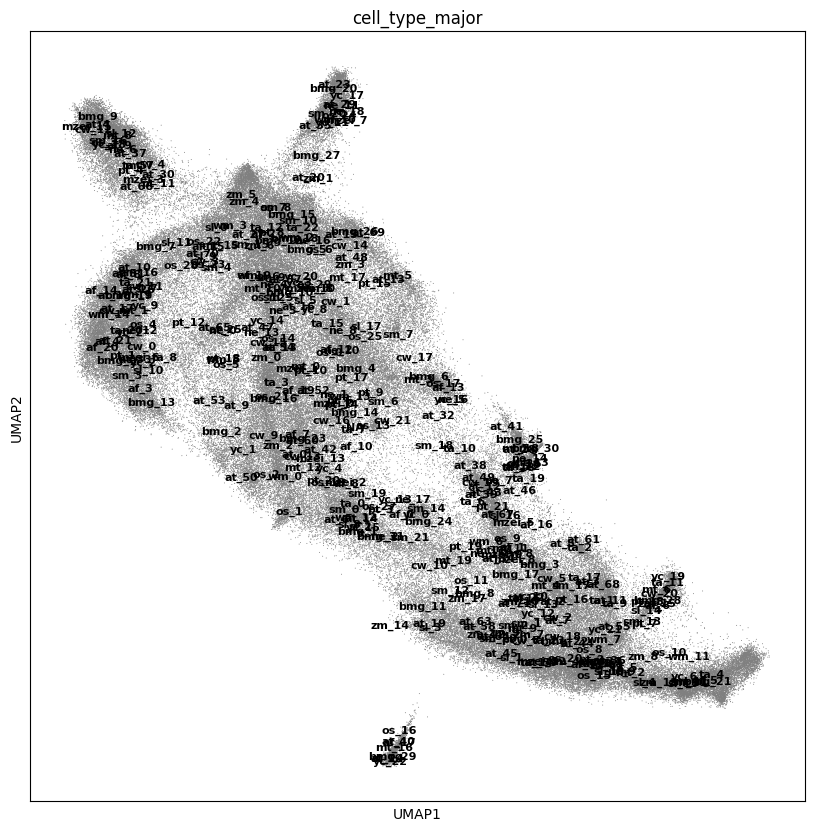

In [48]:
plt.rcParams['figure.figsize'] = (10,10)
sc.pl.umap(adata, color='cell_type_major', 
           # palette=combined_palette, # 如果定义了配色, 取消注释
             legend_loc='on data', ncols=1, 
             size=2, legend_fontsize=8)


### 展示所有物种的分布

In [ ]:
plt.rcParams['figure.figsize'] = (5,8)

# 定义新的颜色调色板, 不同的物种
new_palette = {
    'at': '#e6194B' ,  # 红色
    'os': '#f58231' ,  # 色
    'pt': '#ffe119' ,  # 色
    'ne': '#3cb44b' ,  # 色
    'af': '#4363d8' ,  # 色
    'sm': '#911eb4' # 色
    }

sc.pl.umap(adata, color='species', 
           palette=new_palette,
           size=2)

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


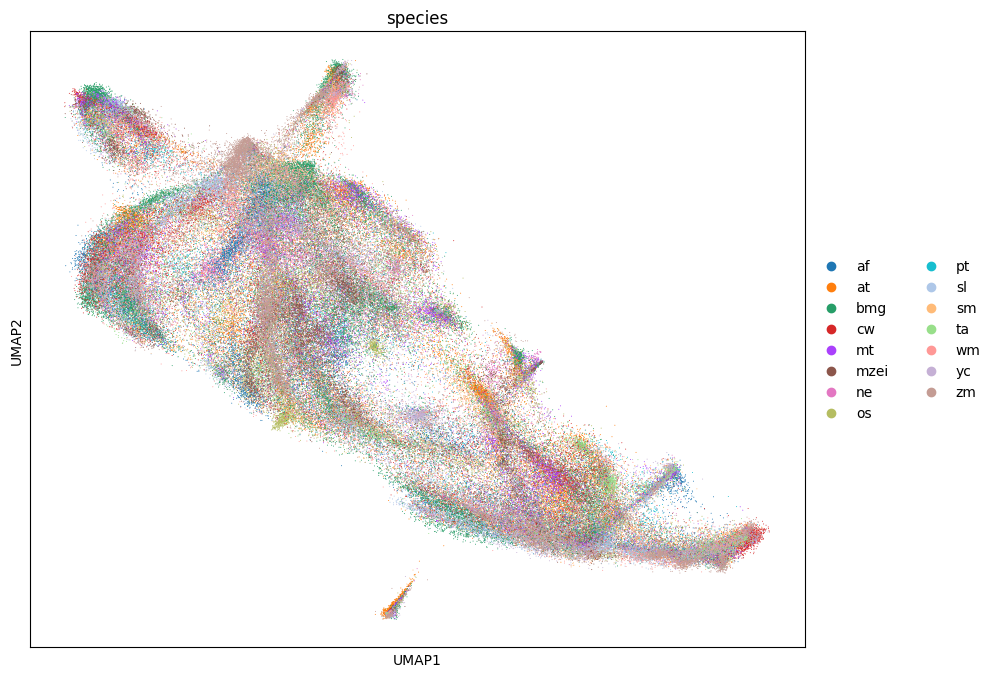

In [51]:
plt.rcParams['figure.figsize'] = (10,8)

sc.pl.umap(adata, color='species', 
           #palette=new_palette,
           size=2)

### 单独高亮其中一个 species

In [ ]:
import scanpy as sc
import pandas as pd

# 示例色彩映射
new_palette = {
    'at': '#e6194B' ,  # 红色
    'os': '#f58231' ,  # 色
    'pt': '#ffe119' ,  # 色
    'ne': '#3cb44b' ,  # 色
    'af': '#4363d8' ,  # 色
    'bmg': '#e6194B' ,  # 红色
    'cw': '#f58231' ,  # 色
    'mt': '#ffe119' ,  # 色
    'mzei': '#3cb44b' ,  # 色
    'af': '#4363d8' ,  # 色
    'at': '#e6194B' ,  # 红色
    'os': '#f58231' ,  # 色
    'pt': '#ffe119' ,  # 色
    'ne': '#3cb44b' ,  # 色
    'af': '#4363d8' ,  # 色
    'sm': '#911eb4' # 色
    }

# 确保 'species' 是分类类型
adata.obs['species'] = adata.obs['species'].astype('category')
species_list = adata.obs['species'].cat.categories

plt.rcParams['figure.figsize'] = (5, 8)  # 设定图形尺寸，只需一次

for species_highlight in species_list:
    # 创建一个指示是否为重点显示物种的临时列
    adata.obs['highlight'] = (adata.obs['species'] == species_highlight)

    # 根据高亮状态排序，使得非高亮物种在 DataFrame 中先出现
    adata_sorted = adata[adata.obs.sort_values(by='highlight', ascending=True).index]

    # 设置调色板：高亮物种使用特定颜色，其他使用灰色
    palette = {species: new_palette.get(species, '#d4d3d5') if species == species_highlight else '#d4d3d5' for species in species_list}

    # 使用排序后的数据，调色板绘图
    sc.pl.umap(adata_sorted, color='species', palette=palette, title=f"UMAP for Species: {species_highlight}", size=5)
    
    # 清理添加的列以避免重复引用问题
    adata.obs.drop(columns='highlight', inplace=True)

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


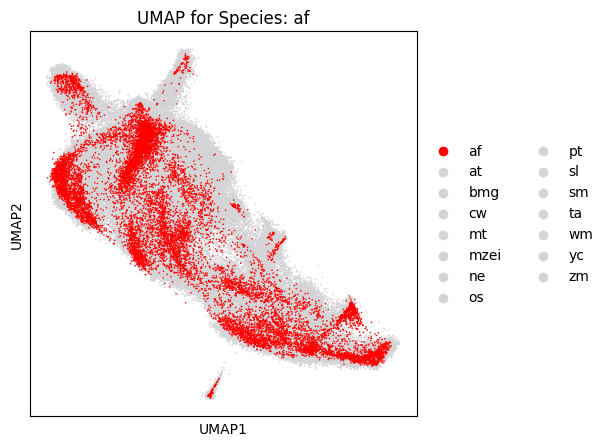

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


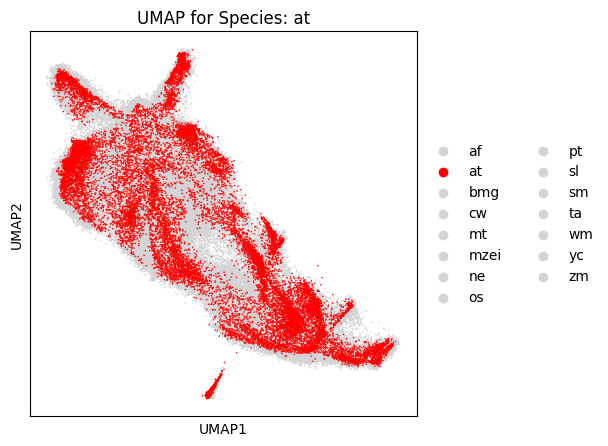

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


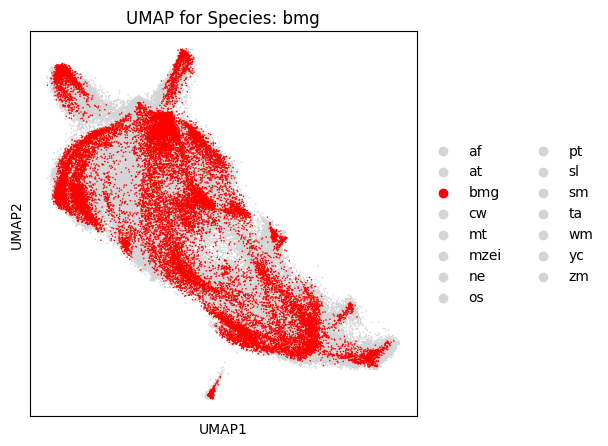

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


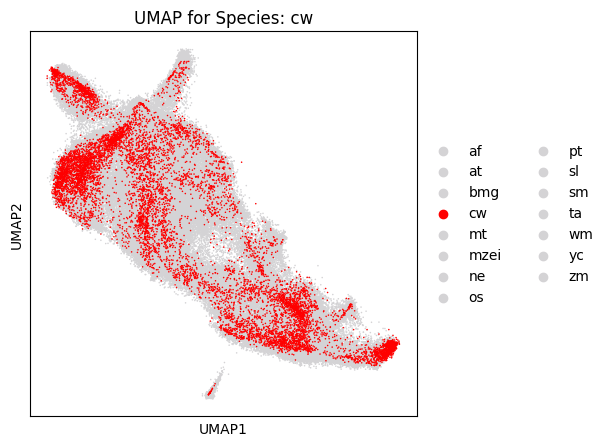

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


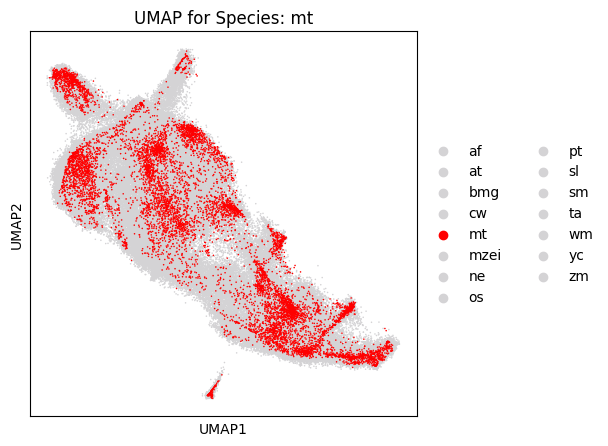

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


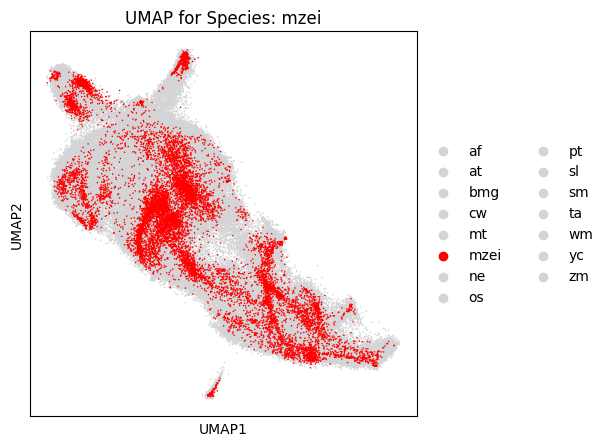

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


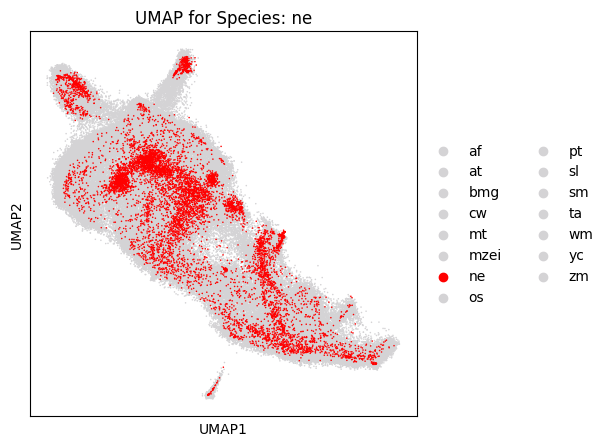

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


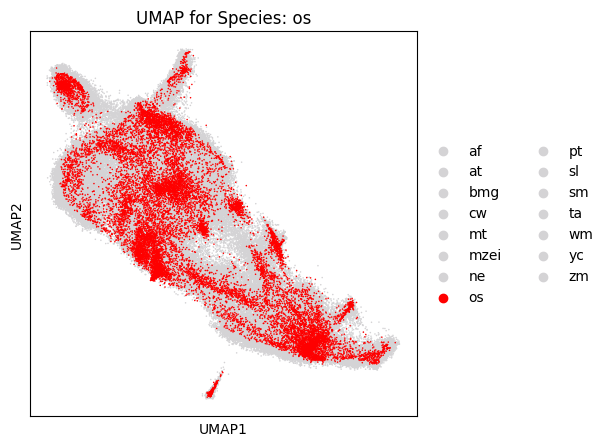

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


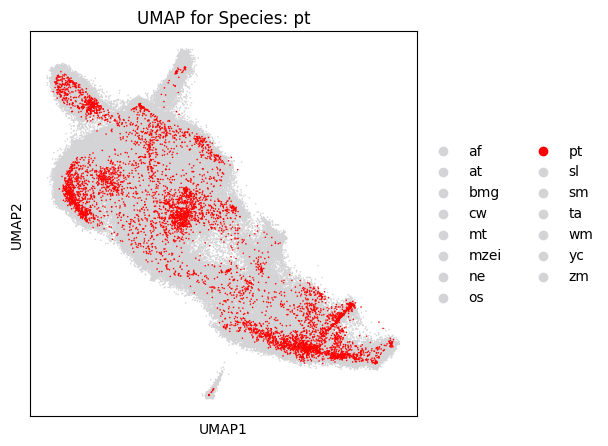

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


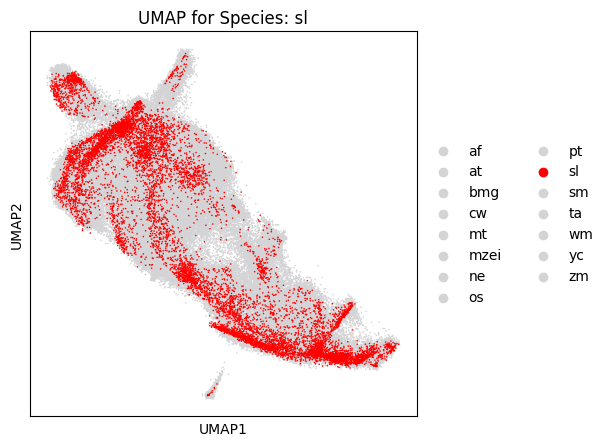

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


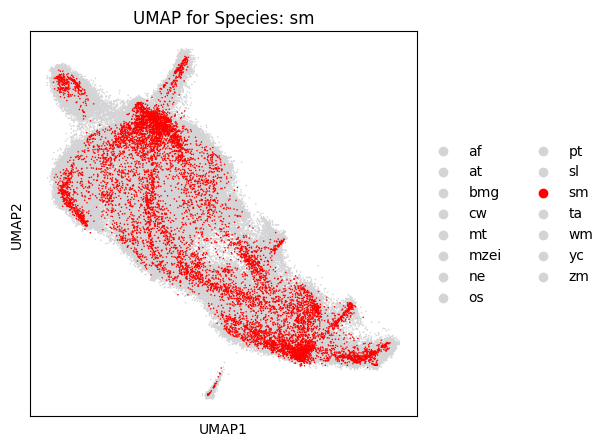

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


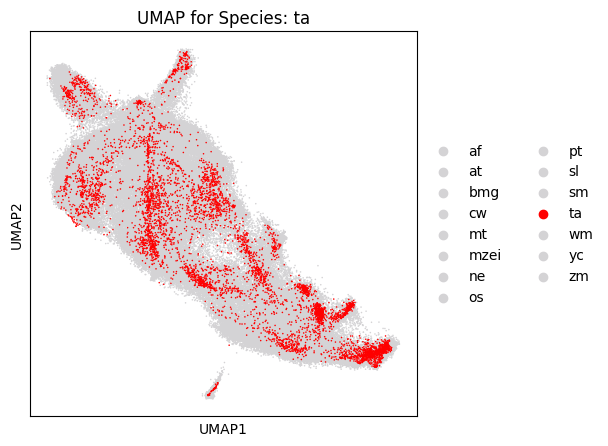

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


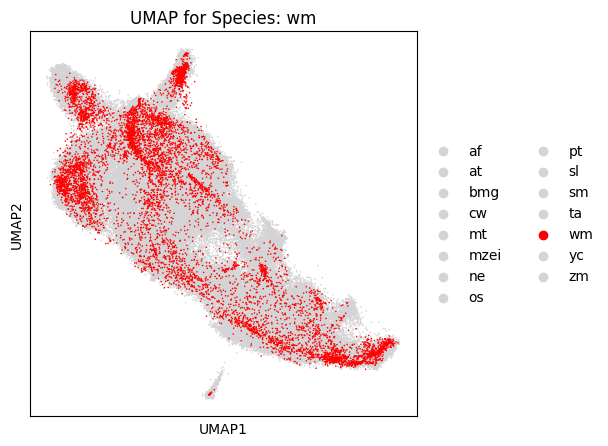

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


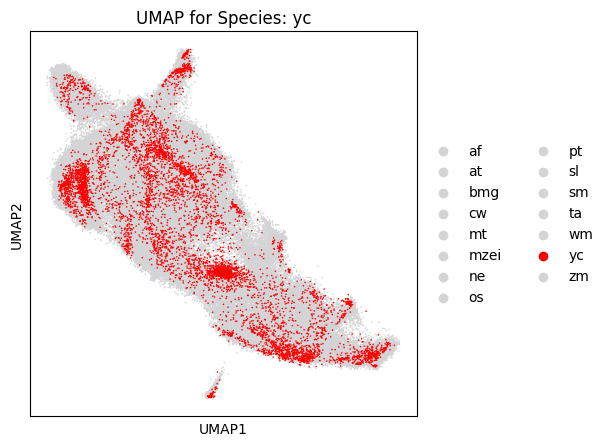

/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/xhc_data/micromamba/envs/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


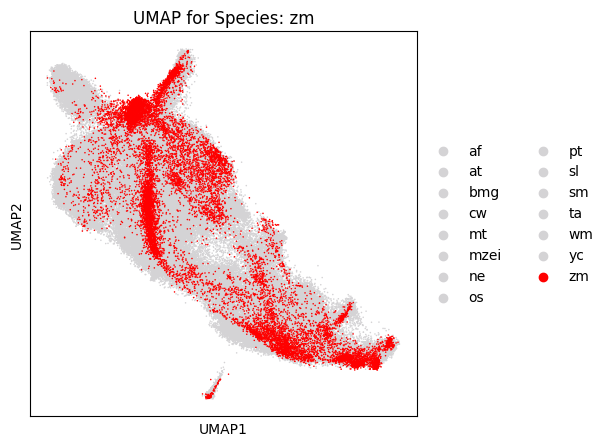

In [53]:
import scanpy as sc
import pandas as pd


# 确保 'species' 是分类类型
adata.obs['species'] = adata.obs['species'].astype('category')
species_list = adata.obs['species'].cat.categories

plt.rcParams['figure.figsize'] = (5, 5)  # 设定图形尺寸，只需一次

for species_highlight in species_list:
    # 创建一个指示是否为重点显示物种的临时列
    adata.obs['highlight'] = (adata.obs['species'] == species_highlight)

    # 根据高亮状态排序，使得非高亮物种在 DataFrame 中先出现
    adata_sorted = adata[adata.obs.sort_values(by='highlight', ascending=True).index]

    # 设置调色板：高亮物种使用特定颜色，其他使用灰色
    palette = {
    species: '#ff0000' if species == species_highlight else '#d4d3d5'
    for species in species_list}


    # 使用排序后的数据，调色板绘图
    sc.pl.umap(adata_sorted, color='species', palette=palette, title=f"UMAP for Species: {species_highlight}", size=5)
    
    # 清理添加的列以避免重复引用问题
    adata.obs.drop(columns='highlight', inplace=True)

## 单个物种分布展示

In [84]:
adata = sm.sams['bmg'].adata
adata.obs.head()

orig.ident  nCount_RNA  nFeature_RNA Condition  \
AAACCCAAGGGCAGTT-1_1  Gifu_Crl1        3567          1919   Control   
AAACCCAAGTCAGCGA-1_1  Gifu_Crl1        7015          2751   Control   
AAACCCACATGATCTG-1_1  Gifu_Crl1       20942          4711   Control   
AAACCCAGTAGCTTGT-1_1  Gifu_Crl1       29105          5157   Control   
AAACCCAGTCTCTCAC-1_1  Gifu_Crl1        6115          2124   Control   

                      percent.mt  percent.chloroplast  nCount_SCT  \
AAACCCAAGGGCAGTT-1_1    4.681805             0.028035        4481   
AAACCCAAGTCAGCGA-1_1    0.712758             0.042766        5678   
AAACCCACATGATCTG-1_1    0.477509             0.124152        4910   
AAACCCAGTAGCTTGT-1_1    0.295482             0.054973        4904   
AAACCCAGTCTCTCAC-1_1    1.602617             0.016353        5524   

                      nFeature_SCT  integrated_snn_res.0.8  seurat_clusters  \
AAACCCAAGGGCAGTT-1_1          1919                       6                6   
AAACCCAAGTCAGCGA-1_1          2751                       0                0   
AAACCCACATGATCTG-1_1          2155                      11               11   
AAACCCAGTAGCTTGT-1_1          2124                       2                2   
AAACCCAGTCTCTCAC-1_1          2124                       0                0   

                          Cell_type Sample_Cluster           Type_Cluster  \
AAACCCAAGGGCAGTT-1_1      Pericycle      Control_6      Control_Pericycle   
AAACCCAAGTCAGCGA-1_1       Root tip      Control_0       Control_Root tip   
AAACCCACATGATCTG-1_1  Atrichoblasts     Control_11  Control_Atrichoblasts   
AAACCCAGTAGCTTGT-1_1   Trichoblasts      Control_2   Control_Trichoblasts   
AAACCCAGTCTCTCAC-1_1       Root tip      Control_0       Control_Root tip   

                     leiden_clusters  
AAACCCAAGGGCAGTT-1_1              43  
AAACCCAAGTCAGCGA-1_1               2  
AAACCCACATGATCTG-1_1               1  
AAACCCAGTAGCTTGT-1_1               7  
AAACCCAGTCTCTCAC-1_1               4

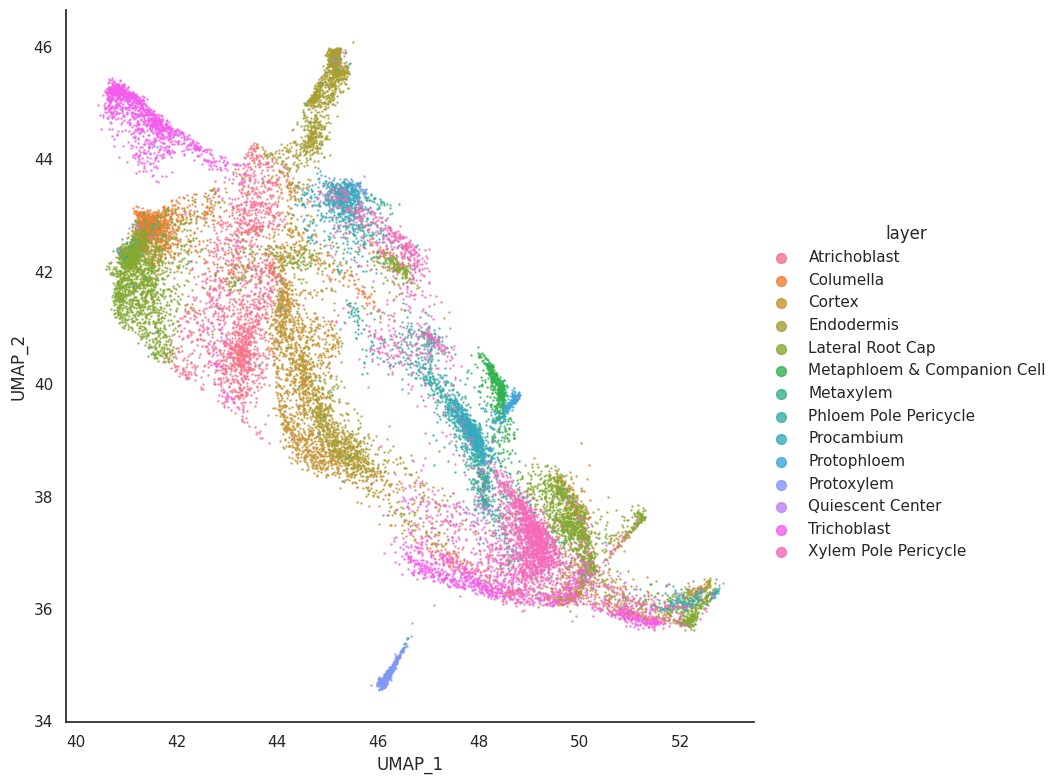

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

adata = sm.sams['at'].adata
# 获取 UMAP 坐标
x = adata.obsm['X_umap_samap'][:, 0]
y = adata.obsm['X_umap_samap'][:, 1]

# 获取类别信息
categories = adata.obs['cell_type']

# 创建 DataFrame
df = pd.DataFrame({'UMAP_1': x, 'UMAP_2': y, 'layer': categories})

# 设置 seaborn 风格和调色板
sns.set(style="white", palette="colorblind", color_codes=True)

height_in_inches = 8
aspect_ratio = 5 / 5
# 使用 seaborn 创建散点图
plot = sns.lmplot(x='UMAP_1',  # 水平轴
           y='UMAP_2',  # 垂直轴
           data=df,  # 数据源
           fit_reg=False,  # 不添加回归线
           hue='layer',  # 设置颜色
           #palette=combined_palette,  # Use the custom palette
           scatter_kws={"marker": "D",  # 设置标记样式
                        "s": 0.5},
            height=height_in_inches,
            aspect=aspect_ratio  # width = height * aspect
            )  # 设置标记大小


# 修改图例中点的大小
for lh in plot._legend.legend_handles: 
    lh._sizes = [50]  # 设置图例中点的大小

# 显示图表
plt.show()


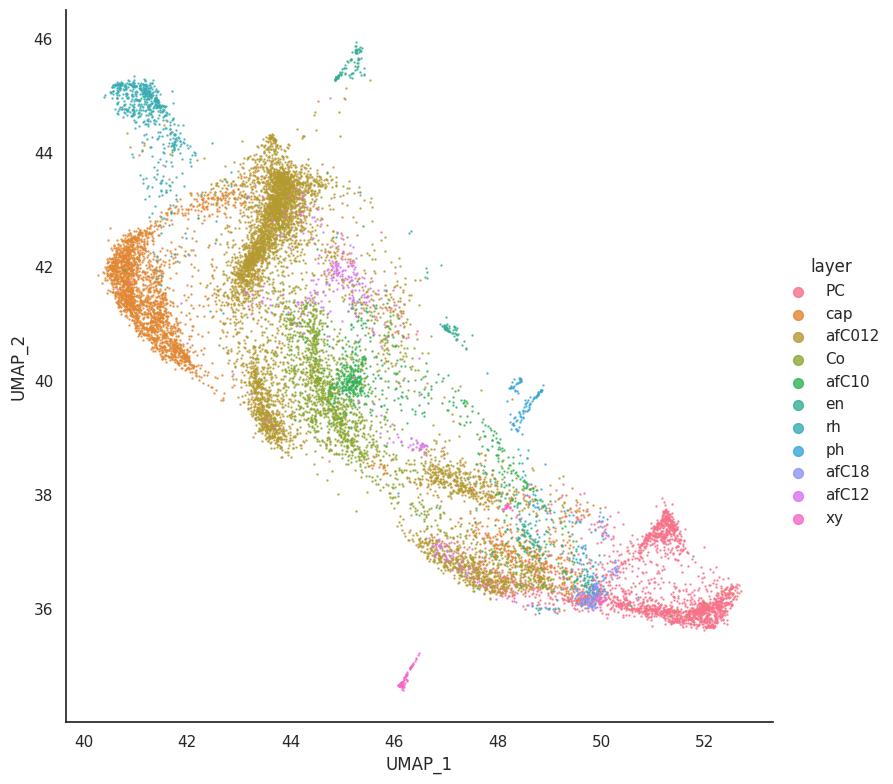

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

adata = sm.sams['af'].adata
# 获取 UMAP 坐标
x = adata.obsm['X_umap_samap'][:, 0]
y = adata.obsm['X_umap_samap'][:, 1]

# 获取类别信息
categories = adata.obs['seurat_clusters_1']

# 创建 DataFrame
df = pd.DataFrame({'UMAP_1': x, 'UMAP_2': y, 'layer': categories})

# 设置 seaborn 风格和调色板
sns.set(style="white", palette="colorblind", color_codes=True)



height_in_inches = 8
aspect_ratio = 8 / 8
# 使用 seaborn 创建散点图
plot = sns.lmplot(x='UMAP_1',  # 水平轴
           y='UMAP_2',  # 垂直轴
           data=df,  # 数据源
           fit_reg=False,  # 不添加回归线
           hue='layer',  # 设置颜色
           #palette=combined_palette,  # Use the custom palette
           scatter_kws={"marker": "D",  # 设置标记样式
                        "s": 0.5},
            height=height_in_inches,
            aspect=aspect_ratio  # width = height * aspect
            )  # 设置标记大小


# 修改图例中点的大小
for lh in plot._legend.legend_handles: 
    lh._sizes = [50]  # 设置图例中点的大小

# 显示图表
plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 假定 sm.sams['bmg'].adata 是一个 AnnData 对象
adata = sm.sams['wm'].adata

# 获取 UMAP 坐标
x = adata.obsm['X_umap_samap'][:, 0]
y = adata.obsm['X_umap_samap'][:, 1]

# 获取类别信息
# categories = adata.obs['seurat_clusters'].astype(str)
# 或者使用其他类别信息：
categories = adata.obs['leiden_clusters'].astype(str)

# 创建 DataFrame
df = pd.DataFrame({'UMAP_1': x, 'UMAP_2': y, 'layer': categories})

# 设置 seaborn 风格和调色板
sns.set(style="white", color_codes=True)

# 定义高度和宽高比例
height_in_inches = 8
aspect_ratio = 5 / 5

# 使用 seaborn 创建散点图
plt.figure(figsize=(height_in_inches * aspect_ratio, height_in_inches))
scatter_plot = sns.scatterplot(
    x='UMAP_1',  # 水平轴
    y='UMAP_2',  # 垂直轴
    data=df,     # 数据源
    hue='layer', # 设置颜色
    palette='tab10',  # 使用默认调色板，或自定义调色板
    marker='o',  # 设置标记样式
    s=10  # 设置标记大小
)

# 计算每个类别的中心位置
centers = df.groupby('layer')[['UMAP_1', 'UMAP_2']].mean().reset_index()

# 在图中添加每个类别的标签
for i in range(centers.shape[0]):
    plt.text(
        centers.iloc[i]['UMAP_1'], centers.iloc[i]['UMAP_2'], centers.iloc[i]['layer'],
        fontsize=12, color='black', ha='center', va='center',  # 可以调整字体大小和颜色
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # 添加边框和填充
    )

# 设置图例的标题和位置
plt.legend(title='类别', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()

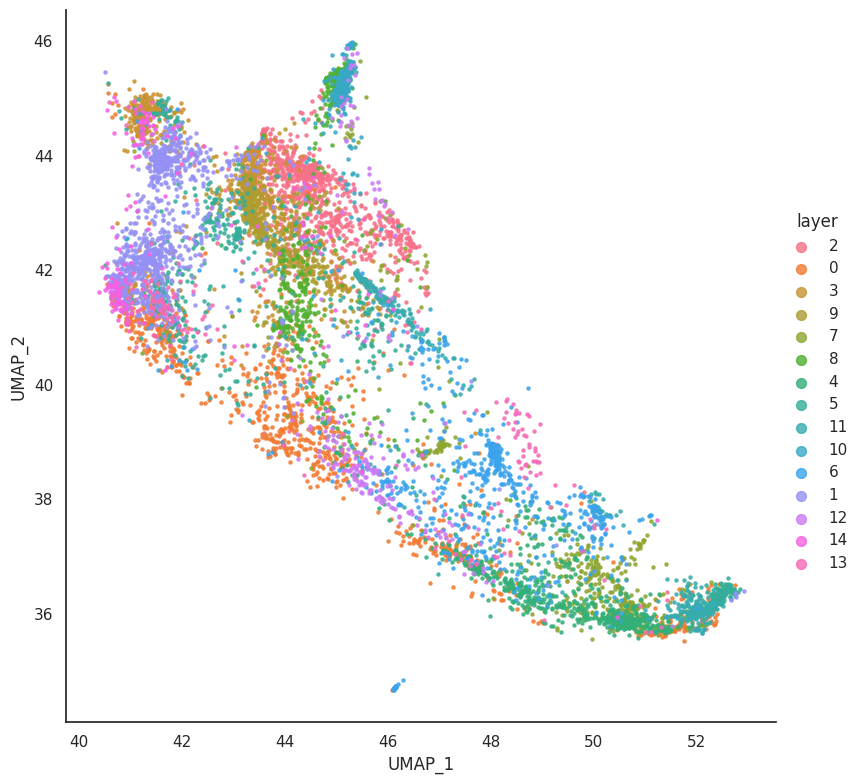

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

adata = sm.sams['wm'].adata
# 获取 UMAP 坐标
x = adata.obsm['X_umap_samap'][:, 0]
y = adata.obsm['X_umap_samap'][:, 1]

# 获取类别信息
categories = adata.obs['seurat_clusters']
#categories = adata.obs['leiden_clusters']

# 创建 DataFrame
df = pd.DataFrame({'UMAP_1': x, 'UMAP_2': y, 'layer': categories})

# 设置 seaborn 风格和调色板
sns.set(style="white", color_codes=True)

# Ensure that the 'layer' column has categories that exactly match the keys in your custom palette
# Use the palette in your seaborn plot function
height_in_inches = 8
aspect_ratio = 5 / 5
# 使用 seaborn 创建散点图
plot = sns.lmplot(x='UMAP_1',  # 水平轴
           y='UMAP_2',  # 垂直轴
           data=df,  # 数据源
           fit_reg=False,  # 不添加回归线
           hue='layer',  # 设置颜色
           #palette=combined_palette,  # Use the custom palette
           scatter_kws={"marker": "D",  # 设置标记样式
                        "s": 5},
            height=height_in_inches,
            aspect=aspect_ratio  # width = height * aspect
            )  # 设置标记大小

# 修改图例中点的大小

# # Adjust legend manually if required
# plt.legend(title='Cell Type', bbox_to_anchor=(1, 1), loc='upper left')

for lh in plot._legend.legend_handles: 
   lh._sizes = [50]  # 设置图例中点的大小

# Display the plot
plt.show()



## 物种间cluster的相似度

In [122]:
# 低分辨率
keys = {'af':'seurat_clusters_1','os':'seurat_clusters_1', 'at': 'cell_type','bmg':'Cell_type',
        'wm':'seurat_clusters','zm':'seurat_clusters'}

#keys = {'os':'seurat_clusters','at':'seurat_high', 'pt': 'seurat_clusters_1'}

# 高分辨率
#keys = {'af':'seurat_clusters','os':'seurat_clusters', 'nesdl': 'seurat_clusters','smg2':'seurat_clusters','pt':'seurat_clusters'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 0)

In [123]:
MappingTable.shape

(88, 88)

<Axes: >

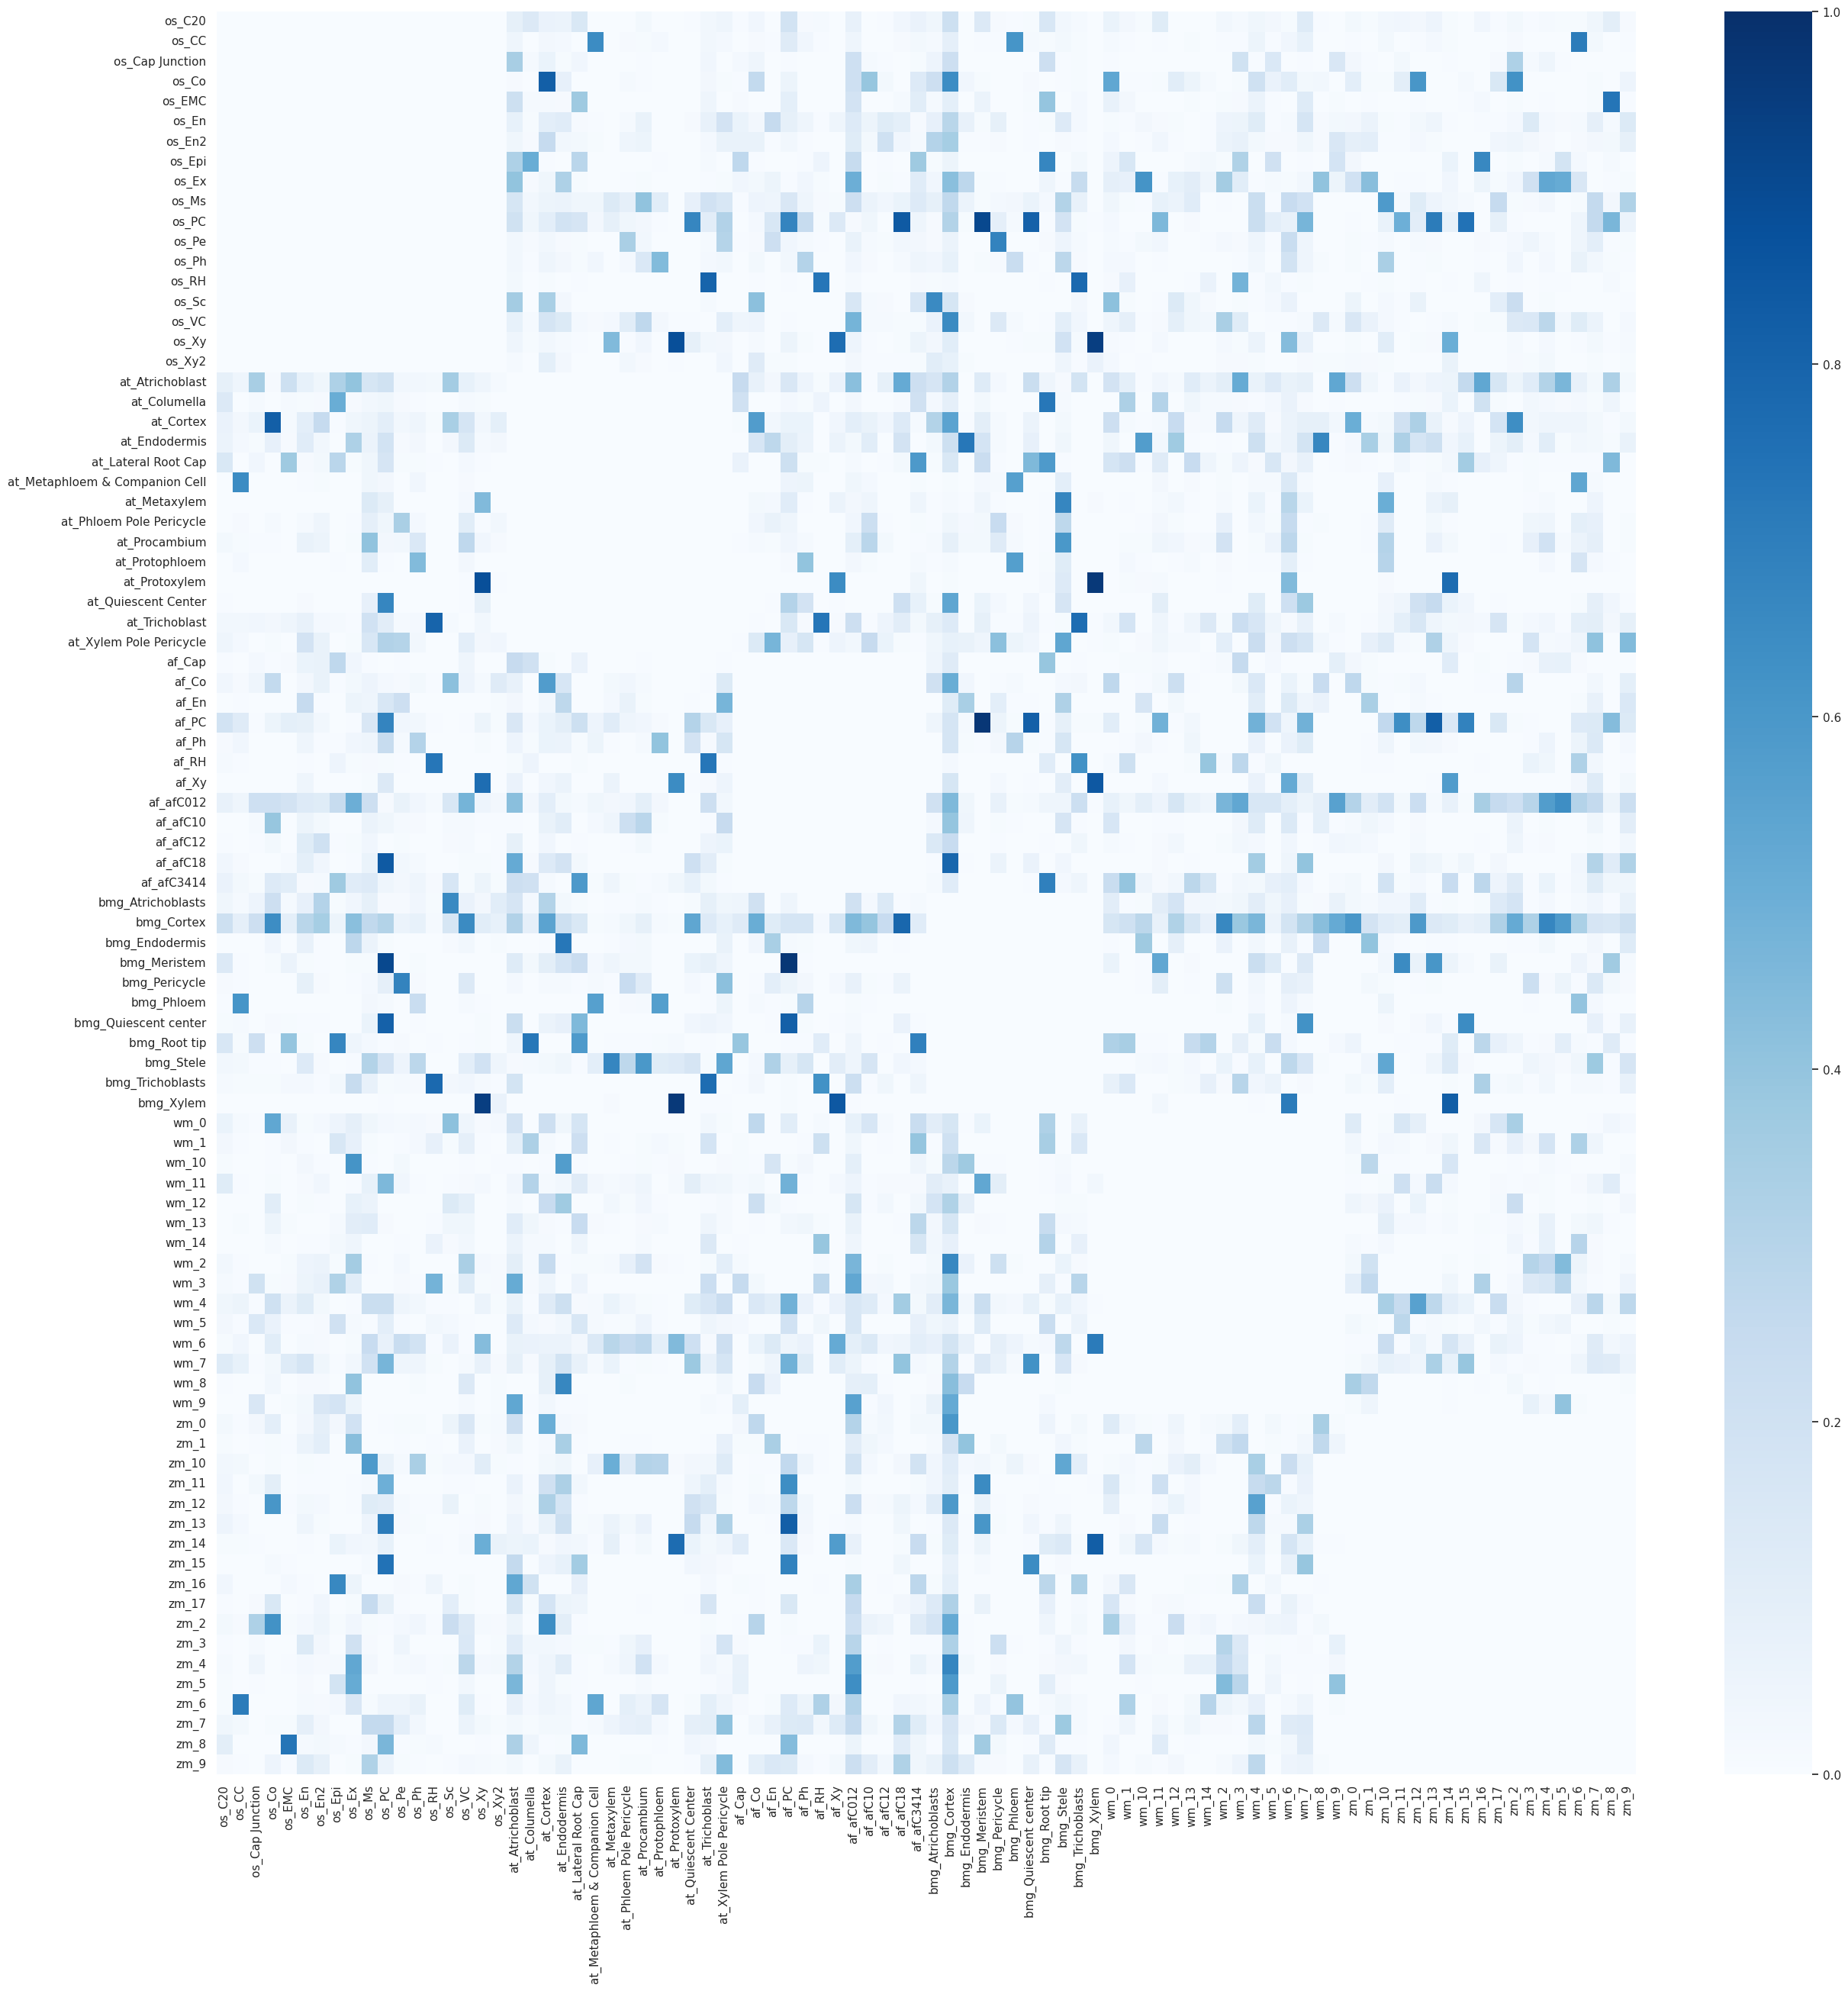

In [124]:
# seaborn heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(30,30))

# set theme
sns.set_theme(style="whitegrid")
# set color palette
cmap = sns.color_palette("Blues", as_cmap=True)

sns.heatmap(MappingTable,ax=ax, cmap=cmap, vmin=0, vmax=1) # sm vs nea

In [29]:
MappingTable.columns

Index(['os_C20', 'os_Cap', 'os_Co', 'os_En', 'os_Epi', 'os_Ex', 'os_Ms',
       'os_Pe', 'os_Ph', 'os_Sc', 'os_VC', 'os_Xy', 'nesdl_En', 'nesdl_PC',
       'nesdl_Pe', 'nesdl_Ph', 'nesdl_Xy', 'nesdl_ne35', 'nesdl_ne46',
       'nesdl_neC02', 'nesdl_neC1', 'nesdl_neC10', 'nesdl_neC11',
       'nesdl_neC19', 'nesdl_neC21', 'nesdl_neC8', 'nesdl_neVP1',
       'nesdl_neVP2', 'nesdl_neVP3', 'smg2_PC', 'smg2_Ph', 'smg2_Xy',
       'smg2_smC03', 'smg2_smC10', 'smg2_smC11', 'smg2_smC12', 'smg2_smC15',
       'smg2_smC17', 'smg2_smC28', 'smg2_smC49', 'smg2_smC6', 'pt_PC',
       'pt_ysC02', 'pt_ysC112', 'pt_ysC13', 'pt_ysC35', 'pt_ysC410', 'pt_ysC7',
       'pt_ysC9', 'af_Cap', 'af_En', 'af_PC', 'af_Ph', 'af_Xy', 'af_afC012',
       'af_afC10', 'af_afC12', 'af_afC18', 'af_afC19', 'af_afC20',
       'af_afC3414', 'af_afC78', 'af_afC9'],
      dtype='object')

In [ ]:
# seaborn heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,8))

# set theme
sns.set_theme(style="whitegrid")
# set color palette
cmap = sns.color_palette("Blues", as_cmap=True)

# sns.heatmap(MappingTable.iloc[12:25,:12],ax=ax, cmap=cmap, vmin=0, vmax=1) # ath vs sm
sns.heatmap(MappingTable.iloc[30:50,:],ax=ax, cmap=cmap, vmin=0, vmax=1) # sm vs nea

#sns.heatmap(MappingTable.iloc[:12,12:],ax=ax, cmap=cmap, vmin=0, vmax=1)


## 同源基因对

SAMap的GenePairFinder用于查找在不同细胞类型中富集的基因对。该方法需要找到对细胞类型间的跨物种相关性有**积极贡献**，并在各自映射的细胞类型中差异表达的基因对。

In [ ]:
D.head(10)

In [5]:
keys = {'af':'seurat_clusters_1','os':'seurat_clusters_1', 'ne': 'seurat_clusters_1','sm':'seurat_clusters_1','pt':'seurat_clusters_1',
        'at':'seurat_clusters_1','bmg':'seurat_clusters_1', 'cw': 'seurat_clusters_1','mt':'seurat_clusters_1','mzei':'seurat_clusters_1',
        'sl':'seurat_clusters_1','ta':'seurat_clusters_1', 'yc': 'seurat_clusters_1','zm':'seurat_clusters_1','wm':'seurat_clusters'}
gpf = GenePairFinder(sm, keys=keys)

Finding cluster-specific markers in os:seurat_clusters_1.
Finding cluster-specific markers in at:seurat_clusters_1.
Finding cluster-specific markers in pt:seurat_clusters_1.
Finding cluster-specific markers in ne:seurat_clusters_1.
Finding cluster-specific markers in af:seurat_clusters_1.
Finding cluster-specific markers in sm:seurat_clusters_1.
Finding cluster-specific markers in bmg:seurat_clusters_1.
Finding cluster-specific markers in cw:seurat_clusters_1.
Finding cluster-specific markers in mt:seurat_clusters_1.
Finding cluster-specific markers in mzei:seurat_clusters_1.
Finding cluster-specific markers in sl:seurat_clusters_1.
Finding cluster-specific markers in ta:seurat_clusters_1.
Finding cluster-specific markers in wm:seurat_clusters.
Finding cluster-specific markers in yc:seurat_clusters_1.
Finding cluster-specific markers in zm:seurat_clusters_1.


In [ ]:
#gene_pairs = gpf.find_all(align_thr=0.2)

In [78]:
sm.sams['ne'].adata.obs['seurat_clusters_1'].unique()

array(['neC02', 'Ph', 'neC1', 'neC35', 'neC46', 'neVP', 'neC21', 'neC11',
       'neC10', 'RH', 'Pe', 'neVC Pe-like', 'neC19', 'neVC C20', 'Xy',
       'En', 'PC'], dtype=object)

In [44]:
# 检查 'seurat_clusters_1' 列中等于 "CC" 的行数
number_of_rows_with_CC = (sm.sams['os'].adata.obs['seurat_clusters_1'] == "CC").sum()
print(f"Number of rows with 'CC': {number_of_rows_with_CC}")

Number of rows with 'CC': 0


In [6]:
# 创建一个空字典用来存储所有物种的基因集
gene_set = {}

# 所有物种的列表
species = ['at','cw','mt','bmg','sl','ta','os','zm','yc','pt','ne','af','mzei','sm']

# 寻找所有物种组合间的基因对Xy
for i in range(len(species)):
    for j in range(i + 1, len(species)):
        sp1 = species[i]
        sp2 = species[j]
        n1 = f"{sp1.lower()}_rh"  # 构建键名，如 'a_L1'
        n2 = f"{sp2.lower()}_rh"  # 构建键名，如 'b_L1'
        key = f"{sp1}{sp2}_rh"   # 字典中的键，如 'AB_L1'

        # 调用函数查找两个物种间的基因对
        Gp, G1, G2, pvals1, pvals2 = gpf.find_genes(n1, n2)
        
        # 将结果存进字典
        gene_set[key] = (Gp, G1, G2, pvals1, pvals2)


In [143]:
gene_set = {}
species = ['af','bmg','cw','mt','mzei','ne','os','sm','ta','yc','zm','sl']

for k in range(len(species)):
    sp1 = "at"
    sp2 = species[k]
    n1 = f"{sp1.lower()}_xy"  # 构建键名，如 'a_L1'
    n2 = f"{sp2.lower()}_xy"  # 构建键名，如 'b_L1'
    key = f"{sp1}{sp2}_xy"   # 字典中的键，如 'AB_L1'
        
    # 调用函数查找两个物种间的基因对
    Gp, G1, G2, pvals1, pvals2 = gpf.find_genes(n1, n2)
        
    # 将结果存进字典
    gene_set[key] = (Gp, G1, G2, pvals1, pvals2)
# 现在字典gene_set会包含所有物种组合的基因对信息

In [7]:
for x,y in gene_set.items():
    print(x, len(y[0]), len(y[1]), len(y[2]))

atcw_rh 991 438 450
atmt_rh 939 320 346
atbmg_rh 969 391 348
atsl_rh 980 319 369
atta_rh 889 178 389
atos_rh 902 376 366
atzm_rh 640 220 257
atyc_rh 504 264 183
atpt_rh 817 281 313
atne_rh 747 352 247
ataf_rh 833 435 344
atmzei_rh 606 335 228
atsm_rh 765 180 282
cwmt_rh 936 278 294
cwbmg_rh 967 376 345
cwsl_rh 948 262 303
cwta_rh 848 142 297
cwos_rh 848 357 340
cwzm_rh 653 181 205
cwyc_rh 536 240 177
cwpt_rh 705 222 254
cwne_rh 705 312 240
cwaf_rh 666 337 295
cwmzei_rh 675 366 267
cwsm_rh 848 183 265
mtbmg_rh 968 348 331
mtsl_rh 979 304 323
mtta_rh 907 170 347
mtos_rh 910 342 324
mtzm_rh 745 226 249
mtyc_rh 644 275 191
mtpt_rh 908 262 284
mtne_rh 799 355 240
mtaf_rh 760 331 264
mtmzei_rh 531 240 164
mtsm_rh 904 167 267
bmgsl_rh 975 291 358
bmgta_rh 878 160 367
bmgos_rh 890 336 356
bmgzm_rh 699 174 216
bmgyc_rh 573 265 190
bmgpt_rh 832 266 284
bmgne_rh 763 331 253
bmgaf_rh 736 313 256
bmgmzei_rh 601 287 211
bmgsm_rh 820 194 318
slta_rh 934 208 386
slos_rh 971 391 322
slzm_rh 808 221 192

In [10]:
# 改用更合适的变量名
species_list = [key for key, value in gene_set.items()]

# 确保 gene_set 是已定义且包含正确的键值对
# 定义完整的 `gene_set` 字典（假设结构为 {'种类名称': (Gp, G1, G2, pvals1, pvals2), ...}）

for species_name in species_list:
    # 使用字典的键直接访问
    if species_name in gene_set:
        (Gp, G1, G2, pvals1, pvals2) = gene_set[species_name]
        # 生成文件名称，保存特定的数据集
        filename = f"{species_name}_Gp.txt"
        with open(filename, 'w') as f:
            # 假定G1是一个可迭代的字符串集合
            for line in Gp:
                # 假定需要将分号`;` 替换为制表符，并写入一个新行
                f.write(line.replace(";", '\t') + '\n') # 注意使用 write() 而不是 writelines()，因为我们这里每次只写一行

In [150]:
def read_lines_from_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return set(file.readlines())

# 指定文件名列表
filenames = [ 'atos_Xy_G1.txt', 'ataf_Xy_G1.txt', 'atnesdl_Xy_G1.txt']

# 读取第一个文件的行到集合中
common_lines = read_lines_from_file(filenames[0])

# 遍历其余的文件并取交集
for filename in filenames[1:]:
    lines_in_current_file = read_lines_from_file(filename)
    common_lines = common_lines.intersection(lines_in_current_file)

# 除去末尾的换行符并打印结果
common_lines = {line.strip() for line in common_lines}
print(common_lines)

{'at_AT3G10080', 'at_AT4G23790', 'at_AT4G19640', 'at_AT3G50360', 'at_AT5G35160', 'at_AT1G02130', 'at_AT5G48930', 'at_AT1G10460', 'at_AT5G15490', 'at_AT5G67210', 'at_AT4G12910', 'at_AT1G07410', 'at_AT5G03260', 'at_AT4G18780', 'at_AT5G01190', 'at_AT1G06700', 'at_AT5G61480', 'at_AT5G65270', 'at_AT3G24550', 'at_AT2G40320', 'at_AT2G24170', 'at_AT5G43700', 'at_AT2G44610', 'at_AT5G51890', 'at_AT3G10410', 'at_AT3G11730', 'at_AT1G04750', 'at_AT5G45970', 'at_AT4G35350', 'at_AT4G09990', 'at_AT1G35160', 'at_AT2G46225', 'at_AT5G44030', 'at_AT4G35950', 'at_AT2G38320', 'at_AT1G01900', 'at_AT5G35960', 'at_AT5G01890', 'at_AT5G37770', 'at_AT5G60020', 'at_AT1G33800', 'at_AT5G03520', 'at_AT3G21550', 'at_AT5G19770', 'at_AT2G22640', 'at_AT2G31110', 'at_AT1G11190', 'at_AT5G01360', 'at_AT2G15320', 'at_AT3G12110', 'at_AT3G53610', 'at_AT3G53520', 'at_AT5G67230', 'at_AT5G59840', 'at_AT5G07080', 'at_AT4G24910', 'at_AT5G12250', 'at_AT4G12650', 'at_AT5G65670', 'at_AT3G53810', 'at_AT5G09810', 'at_AT2G28250', 'at_AT1

In [151]:
def write_lines_to_file(lines, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        for line in lines:  # 可选：排序输出，优化观看
            file.write(line + '\n')  # 添加换行符以确保文件中每行独立


write_lines_to_file(common_lines,'at_vplant_xylem.txt')

In [153]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        return set(file.readlines())

def find_unique_lines(source_file, comparison_file):
    source_lines = read_file(source_file)
    comparison_lines = read_file(comparison_file)
    unique_lines = source_lines.difference(comparison_lines)
    return unique_lines

def write_to_file(lines, output_file_path):
    with open(output_file_path, 'w') as file:
        for line in lines:
            file.write(line)

if __name__ == "__main__":
    file2 = 'at_vplant_xylem.txt'
    file1 = 'atos_Xy_G1.txt'
    unique_lines = find_unique_lines(file1, file2)
    output_file = 'at_addinsdplant_xylem.txt'
    write_to_file(unique_lines, output_file)
    print(f'Unique lines have been written to {output_file}')

Unique lines have been written to at_addinsdplant_xylem.txt


In [154]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        return set(file.readlines())

def find_unique_lines(main_file, comparison_files):
    main_lines = read_file(main_file)
    for file_path in comparison_files:
        comparison_lines = read_file(file_path)
        main_lines.difference_update(comparison_lines)
    return main_lines

def write_to_file(lines, output_file_path):
    with open(output_file_path, 'w') as file:
        for line in lines:
            file.write(line)

if __name__ == "__main__":
    main_file = 'atos_Xy_G1.txt'
    comparison_files = ['ataf_Xy_G1.txt', 'atnesdl_Xy_G1.txt', 'atsmg2_Xy_G1.txt']
    unique_lines = find_unique_lines(main_file, comparison_files)
    output_file = 'at_uniqinos_xylem.txt'
    write_to_file(unique_lines, output_file)
    print(f'Unique lines have been written to {output_file}')

Unique lines have been written to at_uniqinos_xylem.txt


In [112]:
(Gp,G1,G2,pvals1,pvals2 ) = gene_set['atsmg2_Xy'] 

In [101]:
target_gene = "AT1G09440"

In [120]:
# 查找包含 {"TRINITY-DN124-c0-g1-i1.p1", "TRINITY-DN6139-c0-g2-i2.p1", "TRINITY-DN86-c0-g1-i3.p1"} 的 Gp
gp = [ x for x in  Gp.tolist() if x.find(target_gene) > 0 ]

In [121]:
gp

['at_AT1G09440;smg2_Sm-063070',
 'at_AT1G09440;smg2_Sm-081110',
 'at_AT1G09440;smg2_Sm-082210',
 'at_AT1G09440;smg2_Sm-146560',
 'at_AT1G09440;smg2_Sm-253730',
 'at_AT1G09440;smg2_Sm-145760',
 'at_AT1G09440;smg2_Sm-014360',
 'at_AT1G09440;smg2_Sm-176790',
 'at_AT1G09440;smg2_Sm-031910',
 'at_AT1G09440;smg2_Sm-247050',
 'at_AT1G09440;smg2_Sm-119900',
 'at_AT1G09440;smg2_Sm-072110',
 'at_AT1G09440;smg2_Sm-015270',
 'at_AT1G09440;smg2_Sm-046800']

In [144]:
sm.query_gene_pair('at_AT1G09440','smg2_Sm-063070')

{'blast': 199.5, 'correlation': 0.17032325016746389}

/data3/wanglab/ofo/micromamba/envs/SAMap/lib/python3.9/site-packages/samalg/__init__.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = axes.scatter(


<Axes: >

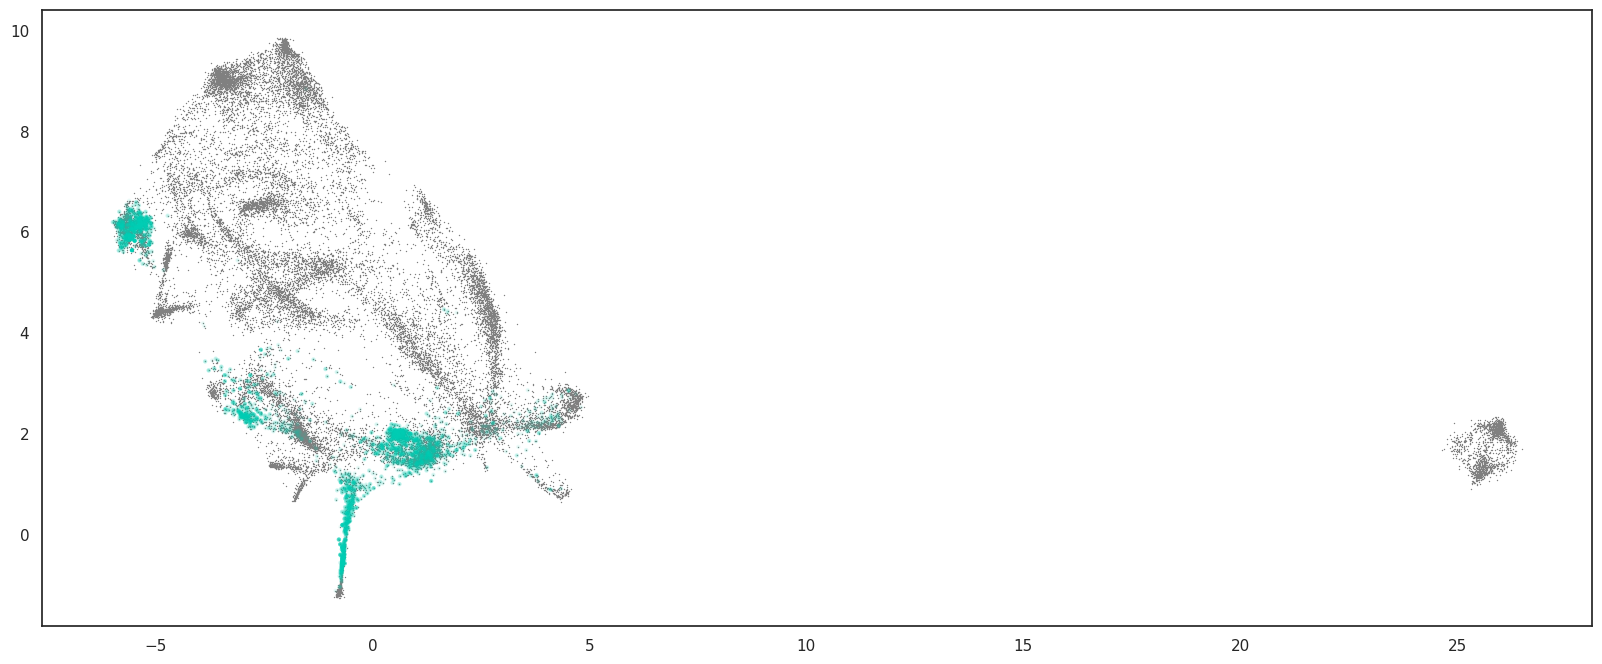

In [156]:
# theme
sm.plot_expression_overlap({'at':'AT3G25710'})

#sm.plot_expression_overlap({'at':'AT1G09440','os':'Os01g0323000','nesdl':'TRINITY-DN7630-c0-g2-i1.p1','smg2':'Sm-119900','af':'Azfi-s0151.g053335'},
                           #COLORS={'at':'#CD5C5C', 'os':'#FF8247',  'nesdl':'#90EE90', 'smg2':'#1C86EE', 'af':'#9932CC'})

### 同源基因对-热图

In [ ]:
def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64)).tolist()
    return out

In [445]:
ath_expr = grouped_obs_mean(sm.sams['ath'].adata, 'seurat_layer')
nea_expr = grouped_obs_mean(sm.sams['nea'].adata, 'seurat_layer')
sm_expr =  grouped_obs_mean(sm.sams['sm'].adata, 'seurat_layer')

In [430]:
gp1 = gene_set['L1'][0]
gp2 = gene_set['L2'][0]
gp3 = gene_set['L3'][0]
gp4 = gene_set['Proliferative Cell'][0]


In [431]:
import pandas as pd

# 创建新矩阵的列名
at_columns = ['L1', 'L2', 'L3', 'Proliferative Cell']
nea_columns = ['L1', 'L2', 'L3', 'Proliferative Cell']
new_columns = [f'at_{col}' for col in at_columns] + [f'nea_{col}' for col in nea_columns]

gp_list = np.concatenate([gp1,gp2,gp3,gp4]).tolist()

In [432]:
# 初始化用于收集新行的列表
new_rows = []

# 填充新行的列表
for gene_pair in gp_list:
    ath_gene, nea_gene = gene_pair.split(';')

    # 从原矩阵中提取表达量
    ath_expr_row = ath_expr.loc[ath_gene, at_columns] if ath_gene in ath_expr.index else pd.Series([0]*len(at_columns), index=at_columns)
    nea_expr_row = nea_expr.loc[nea_gene, nea_columns] if nea_gene in nea_expr.index else pd.Series([0]*len(nea_columns), index=nea_columns)

    # 合并行，并确保索引对齐
    new_row = pd.concat([ath_expr_row.reset_index(drop=True), nea_expr_row.reset_index(drop=True)], axis=0)

    # 将新行添加到列表中
    new_rows.append(new_row)


In [433]:
df = pd.DataFrame(np.array(new_rows), columns=new_columns, index=gp_list)

In [434]:
df2 = df.loc[:,['at_L1','nea_L1', 'at_L2', 'nea_L2','at_L3', 'nea_L3','at_Proliferative Cell', 'nea_Proliferative Cell']]

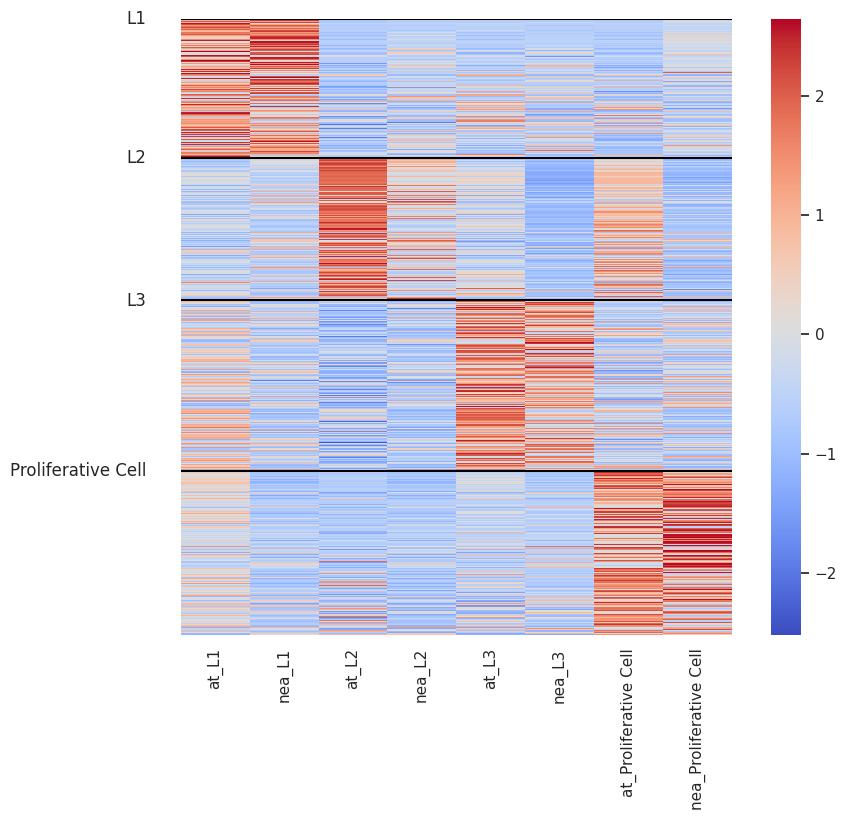

In [444]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_standardized = pd.DataFrame(scaler.fit_transform(df2.T).T, columns=df2.columns, index=df2.index)


# Assuming `df2_scaled` is your scaled DataFrame and is already plotted as a heatmap
plt.figure(figsize=(10, 8))
# 使用 seaborn 绘制热图
ax = sns.heatmap(df2_standardized, annot=False, cmap='coolwarm',  yticklabels=False, )

# Add text annotations for groups
group_labels = ['L1', 'L2', 'L3', 'Proliferative Cell']  # Your group labels
group_row_indices = [0, len(gp1) , len(gp1) + len(gp2) , len(gp1) + len(gp2) + len(gp3) ]

# Loop over your groups and add a text annotation to each
for label, row_index in zip(group_labels, group_row_indices):
    ax.text(-.5, row_index, label, va='center', ha='right')

# Optionally, add horizontal lines to separate the groups
for row_index in group_row_indices:
    ax.hlines(row_index, *ax.get_xlim(), colors='black', linestyles='solid')


# Set the limits so the labels are visible (adjust as necessary)

ax.set_xlim(-1, len(df2_standardized.columns))


plt.show()



## 富集分析

In [557]:
(Gp,G1,G2,pvals1,pvals2 ) = gene_set['Proliferative Cell'] 

In [558]:
gene_list = [x[4:] for x in  G1.tolist() ]

In [559]:
%%R -i gene_list

ego <- enrichGO(gene = gene_list,
                OrgDb = org.At.tair.db,
                keyType = "TAIR",
                ont = "BP", # 选择 "BP", "CC" 或 "MF"
                pAdjustMethod = "BH",
                qvalueCutoff = 0.05,
                readable = TRUE)

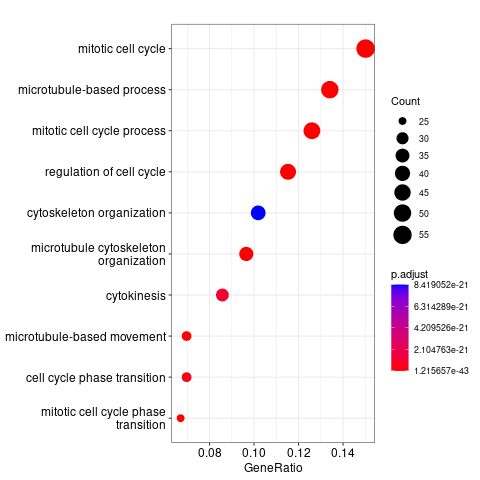

In [560]:
%%R
dotplot(ego)

### 韦恩图

展示原先注释中 给定物种 cluster-specific gene 与 SAMap 找到的基因之间的关系

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [241]:
# 比较拟南芥和卷柏
# 读取差异基因
ath_marker_df = pd.read_csv("result/marker_genes/ath_marker_genes.csv", index_col=0)
ath_marker_L1_df = ath_marker_df.loc[ath_marker_df['group'] == "L1",:]

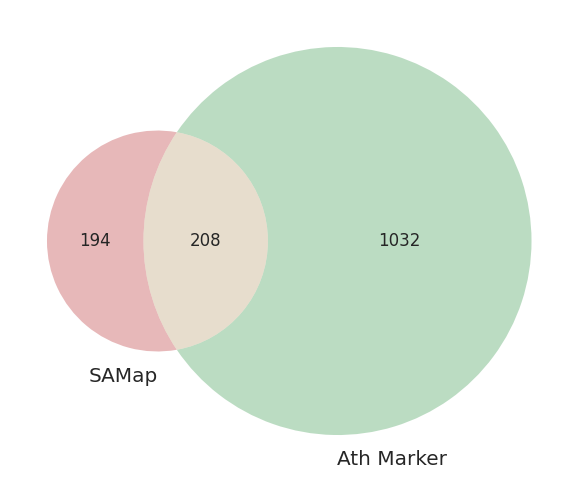

In [251]:
# 定义两个集合
set1 = { gene_id[4:] for gene_id in gene_set['L1'][1] }
set2 = set(ath_marker_L1_df.names.to_list())

# 绘制 Venn 图
venn2([set1, set2], ('SAMap', 'Ath Marker'))

# 显示图表
plt.show()


In [232]:
# 读取差异基因
marker_df2 = pd.read_csv("result/marker_genes/nea_marker_genes.csv", index_col=0)
marker_df2 = marker_df2.loc[marker_df2['group'] == "L1",:]

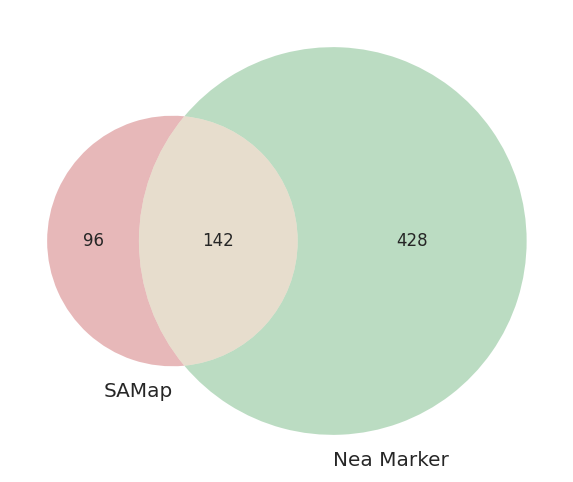

In [236]:
# 定义两个集合
set1 = { gene_id[4:] for gene_id in gene_set['L1'][2] }
set2 = set(marker_df2.names.to_list())

# 绘制 Venn 图
venn2([set1, set2], ('SAMap', 'Nea Marker'))

# 显示图表
plt.show()


In [247]:
# 比较杰哥找到的基因
with open("result/marker_genes/jie_L1_marker.txt", 'r') as f:
    gene_list = f.readlines()

In [255]:
set3 = set1 & set2

In [256]:
set4 = {x.strip() for x in gene_list}

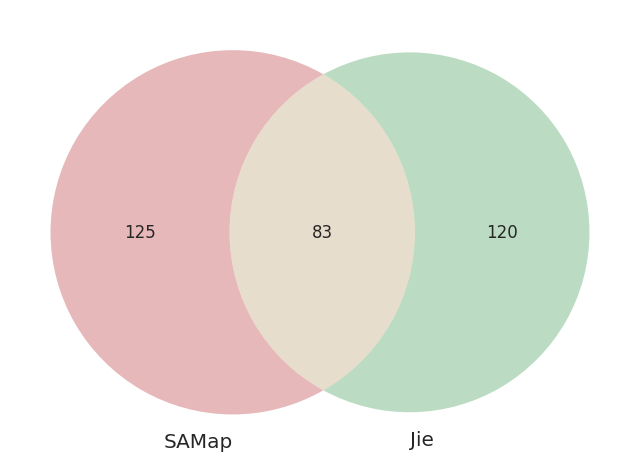

In [257]:
# 绘制 Venn 图
venn2([set3, set4], ('SAMap', 'Jie'))

# 显示图表
plt.show()


## 基因三角形



In [ ]:
keys = {'at':'seurat_layer','ne':'seurat_layer', "smg2": 'seurat_layer', "os": 'seurat_layer', "ss": 'seurat_layer', "pt": 'seurat_layer'}
# 细胞类型间对应关系
result = CellTypeTriangles(sm,keys,align_thr=0.1)

link_df = pd.DataFrame(
    {"source": [], "target": [], "value":[]}
)

for _, row in result.iterrows():
    ath_i = row['ath']
    sm_i = row['sm']
    #nea_i = row['nea']

    sm_ath = link_df.loc[(link_df['source'] == sm_i) & (link_df['target'] == ath_i ),:]
    if sm_ath.shape[0] == 0 :
        link_df.loc[len(link_df)] = [sm_i, ath_i, 1]
    else:
        link_df.loc[sm_ath.index,'value']+=1
    
    # sm_nea = link_df.loc[(link_df['source'] == sm_i) & (link_df['target'] == nea_i ),:]
    # if sm_nea.shape[0] == 0:
    #     link_df.loc[len(link_df)] = [sm_i, nea_i, 1]
    # else:
    #     link_df.loc[sm_nea.index,'value']+=1
    
    # ath_nea = link_df.loc[(link_df['source'] == ath_i) & (link_df['target'] == nea_i ),:]
    # if ath_nea.shape[0] == 0:
    #     link_df.loc[len(link_df)] = [ath_i, nea_i, 1]
    # else:
    #     link_df.loc[ath_nea.index,'value']+=1

# 提取所有独特的节点
all_nodes = pd.concat([link_df['source'], link_df['target']]).unique()

# 创建一个映射所有节点到整数的字典，以供plotly使用
node_indices = {node: i for i, node in enumerate(all_nodes)}

# 应用映射到源节点和目标节点
link_df['source'] = link_df['source'].map(node_indices)
link_df['target'] = link_df['target'].map(node_indices)


import pandas as pd
import plotly.graph_objects as go

# 加载数据，您应该替换为您自己的DataFrame，例如:
# df = pd.read_csv('path_to_your_data.csv')
# 这里我将根据您提供的图像中的数据构建DataFrame


# 创建Sankey图的数据
sankey_data = go.Sankey(
    node=dict(
        pad=5,
        
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(all_nodes),
    ),
    link=dict(
        source=link_df['source'],
        target=link_df['target'],
        value=link_df['value']
    )
)

# 创建图形对象并添加Sankey图数据
fig = go.Figure(data=[sankey_data])

# 显示图形
fig.show()


In [ ]:
# 保存结果
html = fig.to_html()
with open("sm_ath_high.html", "w") as f:
    f.write(html)

# 识别旁系替换基因

旁系亲属替换事件是指不同物种的旁系亲属比直系亲属具有更相似的表达模式。

- 旁系亲属定义为最近的共同祖先是 Eukaryotes 的基因，
- 直系亲属定义为最近的共同祖先是 Streptophyta 的基因。

In [464]:
# read eggnog file, ignore first 4 row
A = pd.read_csv("blast/ath.eggnog.tsv",sep='\t',skiprows=4, index_col=0)
B = pd.read_csv("blast/nea.eggnog.tsv",sep='\t',skiprows=4, index_col=0)
C = pd.read_csv("blast/sm.eggnog.tsv",sep='\t',skiprows=4, index_col=0)

In [465]:
EGGs={'ath':A,'nea':B,'sm':C}

In [486]:
ortholog_pairs = convert_eggnog_to_homologs(sm,EGGs,og_key='eggNOG_OGs',taxon=35493 ) #35493 is the taxon code for Streptophyta  

/home/xzg/SAMap/samap/analysis.py:1099: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [487]:
paralog_pairs = convert_eggnog_to_homologs(sm,EGGs,og_key='eggNOG_OGs',taxon=33090) # 33090 for Viridiplantae ; 2759 for Eukaryotes

/home/xzg/SAMap/samap/analysis.py:1099: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [488]:
Psubs = ParalogSubstitutions(sm,ortholog_pairs,paralog_pairs=paralog_pairs,psub_thr=0.3)

In [495]:
Psubs

ortholog pairs  \
33878       ath_AT2G17560;nea_TRINITY-DN77701-c0-g1-i1.p1   
33640       ath_AT2G15090;nea_TRINITY-DN16258-c0-g1-i1.p1   
78416       nea_TRINITY-DN11735-c0-g1-i2.p1;ath_AT3G20290   
223498        nea_TRINITY-DN718-c2-g1-i2.p1;ath_AT3G20290   
33641       ath_AT2G15090;nea_TRINITY-DN16258-c0-g1-i1.p1   
...                                                   ...   
86810        nea_TRINITY-DN1270-c0-g1-i3.p1;ath_AT4G21790   
140335  nea_TRINITY-DN3027-c0-g1-i5.p1;sm_TRINITY-DN30...   
112928       nea_TRINITY-DN1822-c0-g1-i3.p1;ath_AT5G06850   
112926       nea_TRINITY-DN1822-c0-g1-i3.p1;ath_AT4G11610   
6801         sm_TRINITY-DN22244-c0-g1-i5.p1;ath_AT5G03490   

                                            paralog pairs  ortholog corrs  \
33878        ath_AT2G17560;nea_TRINITY-DN5237-c0-g1-i3.p1        0.000000   
33640         ath_AT2G15090;nea_TRINITY-DN525-c3-g1-i1.p1        0.000000   
78416       nea_TRINITY-DN11735-c0-g1-i2.p1;ath_AT4G05520        0.046422   
223498        nea_TRINITY-DN718-c2-g1-i2.p1;ath_AT4G05520        0.049150   
33641        ath_AT2G15090;nea_TRINITY-DN3991-c2-g2-i2.p1        0.000000   
...                                                   ...             ...   
86810        nea_TRINITY-DN1270-c0-g1-i3.p1;ath_AT1G14530        0.140674   
140335  nea_TRINITY-DN3027-c0-g1-i5.p1;sm_TRINITY-DN18...        0.065927   
112928       nea_TRINITY-DN1822-c0-g1-i3.p1;ath_AT3G03680        0.000000   
112926       nea_TRINITY-DN1822-c0-g1-i3.p1;ath_AT3G03680        0.000000   
6801         sm_TRINITY-DN22244-c0-g1-i5.p1;ath_AT1G06000        0.013312   

        paralog corrs  corr diff  
33878        0.810367   0.810367  
33640        0.806468   0.806468  
78416        0.850055   0.803633  
223498       0.830299   0.781149  
33641        0.773259   0.773259  
...               ...        ...  
86810        0.441430   0.300756  
140335       0.366472   0.300546  
112928       0.300466   0.300466  
112926       0.300466   0.300466  
6801         0.313439   0.300127  

[749 rows x 5 columns]

In [528]:
gene_list = gene_set['L3'][1]

In [529]:
gene_list[0]

'ath_AT3G17020'

In [530]:
for g in gene_list:
    r = [x for x in Psubs['ortholog pairs'] if x.find(g) > 0]
    if len(r) > 0:
        print(r)

['sm_TRINITY-DN3645-c0-g1-i18.p1;ath_AT2G22190']


In [517]:
L1_gene_list[0]

'ath_AT2G38540'

In [521]:
[x for x in Psubs['ortholog pairs'] if x.find('ath_AT2G17560') >= 0]

['ath_AT2G17560;nea_TRINITY-DN77701-c0-g1-i1.p1']

In [483]:
# 寻找ortholog pairs中包含 nea_TRINITY-DN6139-c0-g2-i2.p1 的行

ortholog pairs  \
91330990  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN53...   
91331602  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN87...   
91331245  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN61...   
91331449  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN87...   
91330837  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
91331500  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN87...   
91331551  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN87...   
91330582  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
91330633  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
15573618  sm_TRINITY-DN2320-c0-g1-i3.p1;nea_TRINITY-DN61...   
91331092  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN55...   
91331347  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN61...   
91331296  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN61...   
91330735  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
91330684  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
91330786  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN23...   
30271082  sm_TRINITY-DN5582-c0-g1-i5.p1;nea_TRINITY-DN61...   
91331041  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN53...   

                                              paralog pairs  ortholog corrs  \
91330990  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91331602  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91331245  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91331449  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91330837  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91331500  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91331551  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91330582  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.000000   
91330633  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.009077   
15573618  sm_TRINITY-DN2320-c0-g1-i3.p1;nea_TRINITY-DN13...        0.097468   
91331092  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.012751   
91331347  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.012821   
91331296  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.024638   
91330735  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.027655   
91330684  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.047352   
91330786  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.097468   
30271082  sm_TRINITY-DN5582-c0-g1-i5.p1;nea_TRINITY-DN13...        0.157231   
91331041  nea_TRINITY-DN6139-c0-g2-i2.p1;sm_TRINITY-DN26...        0.123101   

          paralog corrs  corr diff  
91330990       0.241463   0.241463  
91331602       0.241463   0.241463  
91331245       0.241463   0.241463  
91331449       0.241463   0.241463  
91330837       0.241463   0.241463  
91331500       0.241463   0.241463  
91331551       0.241463   0.241463  
91330582       0.241463   0.241463  
91330633       0.241463   0.232386  
15573618       0.329329   0.231861  
91331092       0.241463   0.228712  
91331347       0.241463   0.228642  
91331296       0.241463   0.216825  
91330735       0.241463   0.213808  
91330684       0.241463   0.194111  
91330786       0.241463   0.143995  
30271082       0.294137   0.136907  
91331041       0.241463   0.118362

/home/xzg/miniforge3/envs/SAMap/lib/python3.9/site-packages/samalg/__init__.py:694: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: >

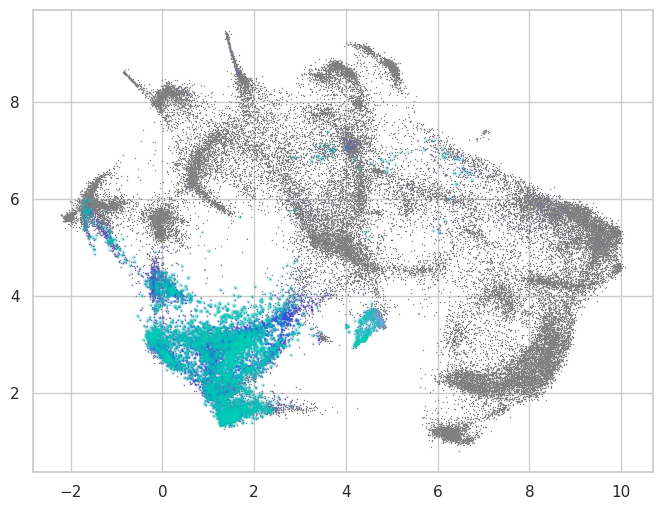

In [531]:
sm.plot_expression_overlap({'ath':'AT1G17840', "nea":"TRINITY-DN6139-c0-g2-i2.p1"})

/home/xzg/miniforge3/envs/SAMap/lib/python3.9/site-packages/samalg/__init__.py:694: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: >

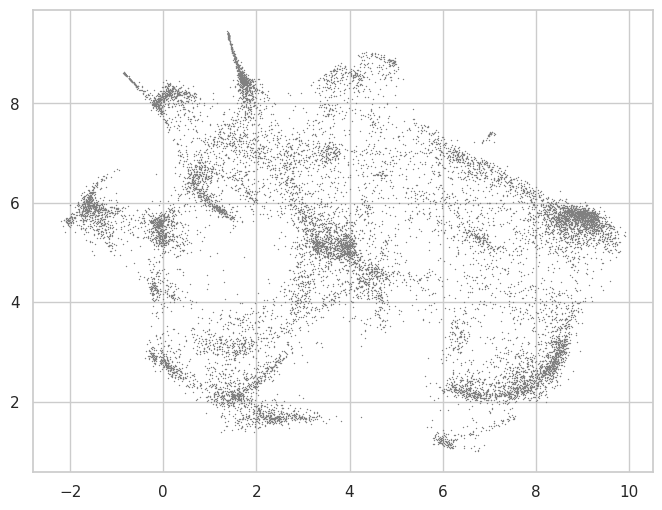

In [497]:
sm.plot_expression_overlap({'nea':'TRINITY-DN77701-c0-g1-i1.p1'})

/home/xzg/miniforge3/envs/SAMap/lib/python3.9/site-packages/samalg/__init__.py:694: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: >

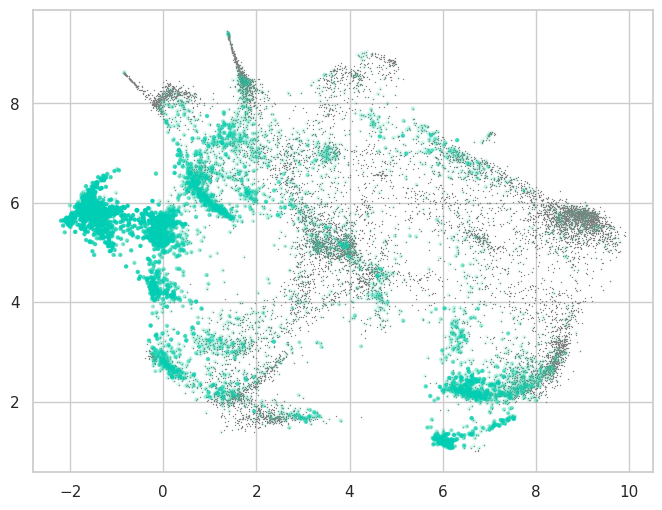

In [496]:
sm.plot_expression_overlap({'nea':'TRINITY-DN5237-c0-g1-i3.p1'})

# Calculating gene triangles

In [144]:
Gtris = GeneTriangles(sm,
                      ortholog_pairs,
                      keys=keys,
                      compute_markers=False)

## Performing functional enrichment analysis


In [125]:
from samap.analysis import _KOG_TABLE

In [126]:
_KOG_TABLE

{'A': 'RNA processing and modification',
 'B': 'Chromatin structure and dynamics',
 'C': 'Energy production and conversion',
 'D': 'Cell cycle control, cell division, chromosome partitioning',
 'E': 'Amino acid transport and metabolism',
 'F': 'Nucleotide transport and metabolism',
 'G': 'Carbohydrate transport and metabolism',
 'H': 'Coenzyme transport and metabolism',
 'I': 'Lipid transport and metabolism',
 'J': 'Translation, ribosomal structure and biogenesis',
 'K': 'Transcription',
 'L': 'Replication, recombination, and repair',
 'M': 'Cell wall membrane/envelope biogenesis',
 'N': 'Cell motility',
 'O': 'Post-translational modification, protein turnover, chaperones',
 'P': 'Inorganic ion transport and metabolism',
 'Q': 'Secondary metabolites biosynthesis, transport and catabolism',
 'R': 'General function prediction only',
 'S': 'Function unknown',
 'T': 'Signal transduction mechanisms',
 'U': 'Intracellular trafficking, secretion, and vesicular transport',
 'V': 'Defense mecha

In [137]:
FE = FunctionalEnrichment(sm,EGGs, col_key='COG_category', keys=keys, align_thr=0.2)

Finding enriched gene pairs...
Finding cluster-specific markers in sm:seurat_layer.
Finding cluster-specific markers in ath:seurat_layer.
Finding cluster-specific markers in nea:seurat_layer.
Calculating gene pairs for the mapping: ath;C21 to nea;L2
Calculating gene pairs for the mapping: ath;C21 to sm;Leaf-L2-like
Calculating gene pairs for the mapping: ath;C8 to nea;L1
Calculating gene pairs for the mapping: ath;C8 to nea;L2
Calculating gene pairs for the mapping: ath;C8 to sm;L1-like
Calculating gene pairs for the mapping: ath;C8 to sm;L2-like
Calculating gene pairs for the mapping: ath;C8 to sm;Leaf-L2-like
Calculating gene pairs for the mapping: ath;L1 to nea;L1
Calculating gene pairs for the mapping: ath;L1 to nea;Proliferative Cell
Calculating gene pairs for the mapping: ath;L1 to sm;L1-like
Calculating gene pairs for the mapping: ath;L1 to sm;L2-like
Calculating gene pairs for the mapping: ath;L1 to sm;Leaf-L1-like
Calculating gene pairs for the mapping: ath;L2 to nea;L1
Calcul

In [138]:
ENRICHMENT_SCORES,NUM_ENRICHED_GENES,ENRICHED_GENES = FE.calculate_enrichment(verbose=True)

Calculating functional enrichment for cell type ath_C21
Calculating functional enrichment for cell type ath_C8
Calculating functional enrichment for cell type ath_L1
Calculating functional enrichment for cell type ath_L2
Calculating functional enrichment for cell type ath_L3


/home/xzg/SAMap/samap/analysis.py:333: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Calculating functional enrichment for cell type ath_Proliferative Cell
Calculating functional enrichment for cell type ath_SAM
Calculating functional enrichment for cell type ath_Shoot Endodermis
Calculating functional enrichment for cell type nea_L1
Calculating functional enrichment for cell type nea_L2
Calculating functional enrichment for cell type nea_L3
Calculating functional enrichment for cell type nea_Proliferative Cell
Calculating functional enrichment for cell type sm_L1-like
Calculating functional enrichment for cell type sm_L2-like
Calculating functional enrichment for cell type sm_L3-like
Calculating functional enrichment for cell type sm_Leaf-L1-like
Calculating functional enrichment for cell type sm_Leaf-L2-like
Calculating functional enrichment for cell type sm_Ligular
Calculating functional enrichment for cell type sm_Rhizophore
Calculating functional enrichment for cell type sm_SAM-like
Calculating functional enrichment for cell type sm_Trabecula
Calculating functiona

/home/xzg/SAMap/samap/analysis.py:429: RuntimeWarning:

invalid value encountered in divide



(<Figure size 641.667x700 with 2 Axes>, <Axes: >)

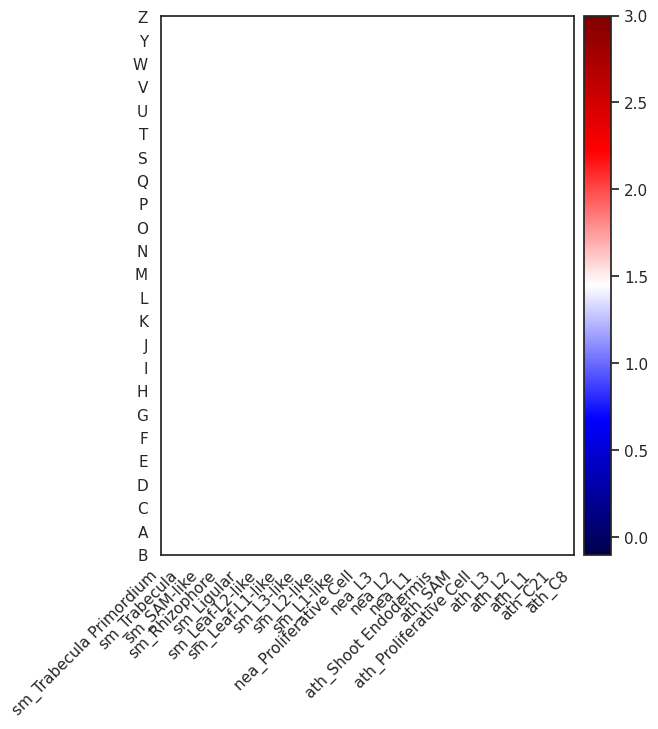

In [139]:
FE.plot_enrichment()